# DSA - Cientista de Dados

## Big Data Analytics com R e Microsoft Azure Machine Learning

# Capítulo 4.2: Big Data na Prática - Mapeando Áreas de Crimes

In [78]:
# Suprimindo Warnings
options(warn=-1)

In [ ]:
install.packages("ggmap")
install.packages("ggplot2")
install.packages("downloader")

In [8]:
library(ggmap)
library(ggplot2)
library(downloader)

In [ ]:
# Download e unzip do arquivo
url <- "http://datascienceacademy.com.br/blog/aluno/RFundamentos/Datasets/Parte3/crimes.zip"
arquivo <- "crimes.zip"

In [2]:
getwd()

[1] "C:/Users/Daniel/Documents/Arquivos Técnicos/Arquivos/Programação/_Cursos/DSA - Cientista de Dados/01. Big Data Analytics com R e Microsoft Azure Machine Learning"

In [83]:
setwd("C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3")

In [ ]:
download(url, arquivo)
unzip("crimes.zip")

In [10]:
# Criando o dataframe
df <- read.csv("crimes.txt")

head(df)

,X,crime_category,Month,Year,Longitude,Latitude
,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,1,Vehicle Theft,12,2014,-122.3478,47.73168
2,2,Warrant Arrest,12,2014,-122.3592,47.51828
3,3,Warrant Arrest,12,2014,-122.3400,47.60882
4,4,Assault,12,2014,-122.3247,47.63973
5,5,Vehicle Theft,12,2014,-122.2992,47.71252
6,6,Other,12,2014,-122.2680,47.51985


In [11]:
# Resumo do df
str(df)

'data.frame':	268772 obs. of  6 variables:
 $ X             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ crime_category: chr  "Vehicle Theft" "Warrant Arrest" "Warrant Arrest" "Assault" ...
 $ Month         : int  12 12 12 12 12 12 9 12 12 12 ...
 $ Year          : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ Longitude     : num  -122 -122 -122 -122 -122 ...
 $ Latitude      : num  47.7 47.5 47.6 47.6 47.7 ...


In [12]:
dim(df)

[1] 268772      6

In [ ]:
# Criando o plot
mapa <- qmap("seattle", zoom = 11, source = "stamen", 
             maptype = "toner", darken = c(.3,"#BBBBBB"))
mapa

In [ ]:
# Mapeando os dados 
mapa + geom_point(data = df, aes(x = Longitude, y = Latitude))

In [ ]:
# Mapeando os dados e ajustando a escala
mapa + geom_point(data = df, aes(x = Longitude, y = Latitude), 
                  color = "dark green", alpha = .03, size = 1.1)

In [ ]:
# Mapeando os dados e definindo uma camada de intensidade
mapa +
  stat_density2d(data = df, aes(x = Longitude, y = Latitude, 
                                color = ..density.., 
                                size = ifelse(..density..<= 1,0,..density..), 
                                alpha = ..density..), geom = "tile",contour = F) +
  scale_color_continuous(low = "orange", high = "red", guide = "none") +
  scale_size_continuous(range = c(0, 3), guide = "none") +
  scale_alpha(range = c(0,.5), guide = "none") +
  ggtitle("Crimes em Seattle") +
  theme(plot.title = element_text(family = "Trebuchet MS", size = 36, face = "bold", hjust = 0, color = "#777777")) 

In [14]:
# Big Data na Prática - Mapeando Áreas de Bikes
library(ggmap)
library(ggplot2)

In [ ]:
# Obtendo os dados
url <- "http://datascienceacademy.com.br/blog/aluno/RFundamentos/Datasets/Parte3/paris.zip"
arquivo <- "paris.zip"

In [ ]:
download(url, arquivo)
unzip("paris.zip")

In [15]:
# Gerando o dataframe
df2 <- read.csv("paris.txt", sep = ",", header = T)

In [16]:
str(df)

'data.frame':	268772 obs. of  6 variables:
 $ X             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ crime_category: chr  "Vehicle Theft" "Warrant Arrest" "Warrant Arrest" "Assault" ...
 $ Month         : int  12 12 12 12 12 12 9 12 12 12 ...
 $ Year          : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ Longitude     : num  -122 -122 -122 -122 -122 ...
 $ Latitude      : num  47.7 47.5 47.6 47.6 47.7 ...


In [17]:
dim(df)

[1] 268772      6

In [ ]:
# Criando o mapa
map.paris <- qmap("paris", source="stamen", zoom=12, maptype="toner", darken=c(.3, "#BBBBBB"))

In [ ]:
# Unindo mapa e camada de dados
map.paris +
  geom_point(data = df2, aes(x = longitude, y = latitude, 
                             size = available_bike_stands, 
                             color = available_bike_stands), 
                             alpha = .9, na.rm = T) +
  scale_color_gradient(low = "#33CC33", high = "#003300", name = "NÃºmero de Bikes DisponÃ­veis") +
  scale_size(range=c(1,11) , guide="none") + 
  ggtitle("NÃºmero de Bikes DisponÃ­veis em Paris") +
  theme(text = element_text(family = "Trebuchet MS", color = "#666666")) +
  theme(plot.title = element_text( size = 32, face = "bold", hjust = 0, vjust = .5))

# Capítulo 4.4: Trabalhando com Arquivos txt

In [19]:
# Usando as funções base do R (pacote utils)
search()

[1] ".GlobalEnv"         "package:downloader" "package:ggmap"     
 [4] "package:ggplot2"    "jupyter:irkernel"   "package:stats"     
 [7] "package:graphics"   "package:grDevices"  "package:utils"     
[10] "package:datasets"   "package:methods"    "Autoloads"         
[13] "package:base"

In [20]:
# Importando arquivo com read.table()
?read.table

In [23]:
df1 <- read.table("pedidos.txt")
df1

# Com a função read.table é necessário especificar qual o caracter que separa as colunas do arquivo

V1
<chr>
"Nome,Pedido,Data"
"Zico,100344509,28/06/2016"
"Rivelino,100344510,29/06/2016"
"Garrincha,100344511,29/06/2016"
"Maradona,1003445012,30/06/2016"
"Marta,100344510,27/06/2016"


In [24]:
dim(df1)

[1] 6 1

In [25]:
df1 <- read.table("pedidos.txt", header = TRUE, sep = ',')
df1

Nome,Pedido,Data
<chr>,<int>,<chr>
Zico,100344509,28/06/2016
Rivelino,100344510,29/06/2016
Garrincha,100344511,29/06/2016
Maradona,1003445012,30/06/2016
Marta,100344510,27/06/2016


In [26]:
dim(df1)

[1] 5 3

In [27]:
# Informando um título para cada uma das colunas do arquivo
df1 <- read.table("pedidos.txt", header = TRUE, sep = ',', 
                  col.names = c("var1", "var2", "var3"))
df1

var1,var2,var3
<chr>,<int>,<chr>
Zico,100344509,28/06/2016
Rivelino,100344510,29/06/2016
Garrincha,100344511,29/06/2016
Maradona,1003445012,30/06/2016
Marta,100344510,27/06/2016


In [28]:
# Nos Registros especificados, importar como NA
df1 <- read.table("pedidos.txt", header = TRUE, 
                  sep = ',', 
                  col.names = c("var1", "var2", "var3"),
                  na.strings = c('Zico', 'Maradona'))
df1

var1,var2,var3
<chr>,<int>,<chr>
NA,100344509,28/06/2016
Rivelino,100344510,29/06/2016
Garrincha,100344511,29/06/2016
NA,1003445012,30/06/2016
Marta,100344510,27/06/2016


In [29]:
str(df1)

'data.frame':	5 obs. of  3 variables:
 $ var1: chr  NA "Rivelino" "Garrincha" NA ...
 $ var2: int  100344509 100344510 100344511 1003445012 100344510
 $ var3: chr  "28/06/2016" "29/06/2016" "29/06/2016" "30/06/2016" ...


In [30]:
df1 <- read.table("pedidos.txt", header = TRUE, 
                  sep = ',', 
                  col.names = c("var1", "var2", "var3"),
                  na.strings = c('Zico', 'Maradona'),
                  stringsAsFactors = FALSE)
df1

var1,var2,var3
<chr>,<int>,<chr>
NA,100344509,28/06/2016
Rivelino,100344510,29/06/2016
Garrincha,100344511,29/06/2016
NA,1003445012,30/06/2016
Marta,100344510,27/06/2016


In [31]:
str(df1)

'data.frame':	5 obs. of  3 variables:
 $ var1: chr  NA "Rivelino" "Garrincha" NA ...
 $ var2: int  100344509 100344510 100344511 1003445012 100344510
 $ var3: chr  "28/06/2016" "29/06/2016" "29/06/2016" "30/06/2016" ...


In [32]:
# Importando arquivo com read.csv()
# A função econhece automaticamente que os campos são separados por vírgula
df2 <- read.csv("pedidos.txt")
df2

Nome,Pedido,Data
<chr>,<int>,<chr>
Zico,100344509,28/06/2016
Rivelino,100344510,29/06/2016
Garrincha,100344511,29/06/2016
Maradona,1003445012,30/06/2016
Marta,100344510,27/06/2016


In [33]:
dim(df2)

[1] 5 3

In [34]:
df3 <- read.csv2("pedidos.txt")
df3

# A função read.csv2 utliza como caracter separador padrão ;

Nome.Pedido.Data
<chr>
"Zico,100344509,28/06/2016"
"Rivelino,100344510,29/06/2016"
"Garrincha,100344511,29/06/2016"
"Maradona,1003445012,30/06/2016"
"Marta,100344510,27/06/2016"


In [35]:
dim(df3)

[1] 5 1

In [36]:
df3 <- read.csv2("pedidos.txt", sep = ',')
df3

# É necessário especificar o parâmetro separador

Nome,Pedido,Data
<chr>,<int>,<chr>
Zico,100344509,28/06/2016
Rivelino,100344510,29/06/2016
Garrincha,100344511,29/06/2016
Maradona,1003445012,30/06/2016
Marta,100344510,27/06/2016


In [37]:
dim(df3)

[1] 5 3

In [38]:
# Importando arquivo com read.delim()
df4 <- read.delim("pedidos.txt")
df4

# A função read.csv2 utliza como caracter separador padrão espaço e tab

Nome.Pedido.Data
<chr>
"Zico,100344509,28/06/2016"
"Rivelino,100344510,29/06/2016"
"Garrincha,100344511,29/06/2016"
"Maradona,1003445012,30/06/2016"
"Marta,100344510,27/06/2016"


In [39]:
df4 <- read.delim("pedidos.txt", sep = ',')
df4

Nome,Pedido,Data
<chr>,<int>,<chr>
Zico,100344509,28/06/2016
Rivelino,100344510,29/06/2016
Garrincha,100344511,29/06/2016
Maradona,1003445012,30/06/2016
Marta,100344510,27/06/2016


In [40]:
dim(df4)

[1] 5 3

## Importando / Exportando

In [41]:
#Gerando arquivo
write.table(mtcars, file = 'mtcars.txt')

In [42]:
dir()

[1] "__MACOSX"         "cadastro.csv"     "crimes.txt"       "indice.csv"      
 [5] "mtcars.txt"       "paris.txt"        "pedidos.txt"      "sono.csv"        
 [9] "temperaturas.txt" "tempo.txt"        "titanic.csv"      "UrbanPop.xlsx"   
[13] "zips.json"

In [43]:
df_mtcars <- read.table("mtcars.txt")
df_mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [44]:
dim(df_mtcars)

[1] 32 11

In [45]:
# Lendo arquivo e especificando colunas separadas por |
write.table(mtcars, file = "mtcars2.txt", sep = "|", col.names = NA, qmethod = "double")

In [46]:
list.files()

[1] "__MACOSX"         "cadastro.csv"     "crimes.txt"       "indice.csv"      
 [5] "mtcars.txt"       "mtcars2.txt"      "paris.txt"        "pedidos.txt"     
 [9] "sono.csv"         "temperaturas.txt" "tempo.txt"        "titanic.csv"     
[13] "UrbanPop.xlsx"    "zips.json"

In [47]:
read.table("mtcars2.txt")

V1,V2
<chr>,<chr>
,"|""mpg""|""cyl""|""disp""|""hp""|""drat""|""wt""|""qsec""|""vs""|""am""|""gear""|""carb"""
Mazda RX4,|21|6|160|110|3.9|2.62|16.46|0|1|4|4
Mazda RX4 Wag,|21|6|160|110|3.9|2.875|17.02|0|1|4|4
Datsun 710,|22.8|4|108|93|3.85|2.32|18.61|1|1|4|1
Hornet 4 Drive,|21.4|6|258|110|3.08|3.215|19.44|1|0|3|1
Hornet Sportabout,|18.7|8|360|175|3.15|3.44|17.02|0|0|3|2
Valiant,|18.1|6|225|105|2.76|3.46|20.22|1|0|3|1
Duster 360,|14.3|8|360|245|3.21|3.57|15.84|0|0|3|4
Merc 240D,|24.4|4|146.7|62|3.69|3.19|20|1|0|4|2


In [48]:
df_mtcars2 <- read.table("mtcars2.txt")
df_mtcars2

# A função read.table não reconheceu o separador |

V1,V2
<chr>,<chr>
,"|""mpg""|""cyl""|""disp""|""hp""|""drat""|""wt""|""qsec""|""vs""|""am""|""gear""|""carb"""
Mazda RX4,|21|6|160|110|3.9|2.62|16.46|0|1|4|4
Mazda RX4 Wag,|21|6|160|110|3.9|2.875|17.02|0|1|4|4
Datsun 710,|22.8|4|108|93|3.85|2.32|18.61|1|1|4|1
Hornet 4 Drive,|21.4|6|258|110|3.08|3.215|19.44|1|0|3|1
Hornet Sportabout,|18.7|8|360|175|3.15|3.44|17.02|0|0|3|2
Valiant,|18.1|6|225|105|2.76|3.46|20.22|1|0|3|1
Duster 360,|14.3|8|360|245|3.21|3.57|15.84|0|0|3|4
Merc 240D,|24.4|4|146.7|62|3.69|3.19|20|1|0|4|2


In [49]:
# Utilizando a função read.table e especificando o separador |
df_mtcars2 <- read.table("mtcars2.txt", sep = '|')
df_mtcars2

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.46,20.22,1,0,3,1
Duster 360,14.3,8,360,245,3.21,3.57,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.19,20,1,0,4,2


In [50]:
df_mtcars2 <- read.table("mtcars2.txt", sep = '|', encoding = 'UTF-8')
df_mtcars2

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.46,20.22,1,0,3,1
Duster 360,14.3,8,360,245,3.21,3.57,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.19,20,1,0,4,2


In [ ]:
# Importando arquivos da internet
df_pedidos <- read.table("http://datascienceacademy.com.br/blog/aluno/RFundamentos/Datasets/Parte3/pedidos.txt", sep = ',')
df_pedidos

# Capítulo 4.5: Trabalhando com arquivos CSV

In [51]:
# Usando o pacote readr 
#install.packages("readr")
library(readr)

In [53]:
# Abre o promt para escolher o arquivo
meu_arquivo <- read_csv(file.choose())

Rows: 7823 Columns: 1
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (1): 1             1             1995         44.0

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
meu_arquivo <- read_delim(file.choose(), sep = "|")

In [55]:
# Importando arquivos
df1 <- read_table("temperaturas.txt", 
                  col_names = c("DAY","MONTH","YEAR","TEMP"))


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  DAY = col_double(),
  MONTH = col_double(),
  YEAR = col_double(),
  TEMP = col_double()
)



In [56]:
head(df1)

DAY,MONTH,YEAR,TEMP
<dbl>,<dbl>,<dbl>,<dbl>
1,1,1995,44.0
1,2,1995,41.8
1,3,1995,28.1
1,4,1995,31.7
1,5,1995,21.3
1,6,1995,27.9


In [57]:
str(df1)

spec_tbl_df [7,824 x 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ DAY  : num [1:7824] 1 1 1 1 1 1 1 1 1 1 ...
 $ MONTH: num [1:7824] 1 2 3 4 5 6 7 8 9 10 ...
 $ YEAR : num [1:7824] 1995 1995 1995 1995 1995 ...
 $ TEMP : num [1:7824] 44 41.8 28.1 31.7 21.3 27.9 42.8 35.5 34.4 29.9 ...
 - attr(*, "problems")= tibble [3 x 5] (S3: tbl_df/tbl/data.frame)
  ..$ row     : int [1:3] 4623 5016 5213
  ..$ col     : chr [1:3] NA NA NA
  ..$ expected: chr [1:3] "4 columns" "4 columns" "4 columns"
  ..$ actual  : chr [1:3] "5 columns" "5 columns" "5 columns"
  ..$ file    : chr [1:3] "'temperaturas.txt'" "'temperaturas.txt'" "'temperaturas.txt'"
 - attr(*, "spec")=
  .. cols(
  ..   DAY = col_double(),
  ..   MONTH = col_double(),
  ..   YEAR = col_double(),
  ..   TEMP = col_double()
  .. )


In [58]:
read_lines("temperaturas.txt", skip = 0, n_max = -1L)

[1] " 1             1             1995         44.0"
   [2] " 1             2             1995         41.8"
   [3] " 1             3             1995         28.1"
   [4] " 1             4             1995         31.7"
   [5] " 1             5             1995         21.3"
   [6] " 1             6             1995         27.9"
   [7] " 1             7             1995         42.8"
   [8] " 1             8             1995         35.5"
   [9] " 1             9             1995         34.4"
  [10] " 1             10            1995         29.9"
  [11] " 1             11            1995         30.7"
  [12] " 1             12            1995         35.5"
  [13] " 1             13            1995         47.2"
  [14] " 1             14            1995         52.4"
  [15] " 1             15            1995         56.9"
  [16] " 1             16            1995         55.2"
  [17] " 1             17            1995         50.3"
  [18] " 1             18            1995         42.6"
  [19] " 1             19            1995         39.3"
  [20] " 1             20            1995         43.1"
  [21] " 1             21            1995         43.2"
  [22] " 1             22            1995         36.0"
  [23] " 1             23            1995         33.3"
  [24] " 1             24            1995         35.8"
  [25] " 1             25            1995         38.3"
  [26] " 1             26            1995         36.6"
  [27] " 1             27            1995         34.3"
  [28] " 1             28            1995         28.2"
  [29] " 1             29            1995         26.0"
  [30] " 1             30            1995         33.8"
  [31] " 1             31            1995         36.6"
  [32] " 2             1             1995         40.5"
  [33] " 2             2             1995         40.6"
  [34] " 2             3             1995         25.6"
  [35] " 2             4             1995         31.3"
  [36] " 2             5             1995         24.7"
  [37] " 2             6             1995         11.1"
  [38] " 2             7             1995         19.0"
  [39] " 2             8             1995         23.7"
  [40] " 2             9             1995         22.3"
  [41] " 2             10            1995         33.0"
  [42] " 2             11            1995         39.6"
  [43] " 2             12            1995         23.1"
  [44] " 2             13            1995         19.1"
  [45] " 2             14            1995         27.5"
  [46] " 2             15            1995         29.8"
  [47] " 2             16            1995         39.9"
  [48] " 2             17            1995         39.4"
  [49] " 2             18            1995         40.5"
  [50] " 2             19            1995         40.6"
  [51] " 2             20            1995         43.1"
  [52] " 2             21            1995         38.1"
  [53] " 2             22            1995         35.3"
  [54] " 2             23            1995         40.2"
  [55] " 2             24            1995         43.3"
  [56] " 2             25            1995         31.2"
  [57] " 2             26            1995         28.4"
  [58] " 2             27            1995         29.8"
  [59] " 2             28            1995         34.9"
  [60] " 3             1             1995         39.7"
  [61] " 3             2             1995         35.0"
  [62] " 3             3             1995         32.6"
  [63] " 3             4             1995         35.4"
  [64] " 3             5             1995         39.0"
  [65] " 3             6             1995         44.0"
  [66] " 3             7             1995         45.8"
  [67] " 3             8             1995         52.6"
  [68] " 3             9             1995         35.3"
  [69] " 3             10            1995         27.6"
  [70] " 3             11            1995         37.5"
  [71] " 3             12            1995         40.0"
  [72] " 3             13  

In [59]:
read_file("temperaturas.txt")

[1] " 1             1             1995         44.0\n 1             2             1995         41.8\n 1             3             1995         28.1\n 1             4             1995         31.7\n 1             5             1995         21.3\n 1             6             1995         27.9\n 1             7             1995         42.8\n 1             8             1995         35.5\n 1             9             1995         34.4\n 1             10            1995         29.9\n 1             11            1995         30.7\n 1             12            1995         35.5\n 1             13            1995         47.2\n 1             14            1995         52.4\n 1             15            1995         56.9\n 1             16            1995         55.2\n 1             17            1995         50.3\n 1             18            1995         42.6\n 1             19            1995         39.3\n 1             20            1995         43.1\n 1             21            1995         43.2\n 1             22            1995         36.0\n 1             23            1995         33.3\n 1             24            1995         35.8\n 1             25            1995         38.3\n 1             26            1995         36.6\n 1             27            1995         34.3\n 1             28            1995         28.2\n 1             29            1995         26.0\n 1             30            1995         33.8\n 1             31            1995         36.6\n 2             1             1995         40.5\n 2             2             1995         40.6\n 2             3             1995         25.6\n 2             4             1995         31.3\n 2             5             1995         24.7\n 2             6             1995         11.1\n 2             7             1995         19.0\n 2             8             1995         23.7\n 2             9             1995         22.3\n 2             10            1995         33.0\n 2             11            1995         39.6\n 2             12            1995         23.1\n 2             13            1995         19.1\n 2             14            1995         27.5\n 2             15            1995         29.8\n 2             16            1995         39.9\n 2             17            1995         39.4\n 2             18            1995         40.5\n 2             19            1995         40.6\n 2             20            1995         43.1\n 2             21            1995         38.1\n 2             22            1995         35.3\n 2             23            1995         40.2\n 2             24            1995         43.3\n 2             25            1995         31.2\n 2             26            1995         28.4\n 2             27            1995         29.8\n 2             28            1995         34.9\n 3             1             1995         39.7\n 3             2             1995         35.0\n 3             3             1995         32.6\n 3             4             1995         35.4\n 3             5             1995         39.0\n 3             6             1995         44.0\n 3             7             1995         45.8\n 3             8             1995         52.6\n 3             9             1995         35.3\n 3             10            1995         27.6\n 3             11            1995         37.5\n 3             12            1995         40.0\n 3             13            1995         51.2\n 3             14            1995         51.8\n 3             15            1995         51.2\n 3             16            1995         49.7\n 3             17            1995         49.0\n 3             18            1995         47.6\n 3             19            1995         46.3\n 3             20            1995         45.6\n 3             21            1995         51.4\n 3             22            1995         49.2\n 3             23            1995         46.0\n 3             24            1995         43.6\n 3         

In [60]:
# Exportando e Importando
write_csv(iris, "iris.csv")

In [61]:
dir()

[1] "__MACOSX"         "cadastro.csv"     "crimes.txt"       "indice.csv"      
 [5] "iris.csv"         "mtcars.txt"       "mtcars2.txt"      "paris.txt"       
 [9] "pedidos.txt"      "sono.csv"         "temperaturas.txt" "tempo.txt"       
[13] "titanic.csv"      "UrbanPop.xlsx"    "zips.json"

In [ ]:
# col_integer(): 
# col_double(): 
# col_logical(): 
# col_character(): 
# col_factor(): 
# col_skip(): 
# col_date() (alias = "D"), col_datetime() (alias = "T"), col_time() ("t") 

In [62]:
df_iris <- read_csv("iris.csv", col_types = list(
  Sepal.Length = col_double(),
  Sepal.Width = col_double(),
  Petal.Length = col_double(),
  Petal.Width = col_double(),
  Species = col_factor(c("setosa", "versicolor", "virginica"))
))

In [63]:
dim(df_iris)

[1] 150   5

In [64]:
str(df_iris)

spec_tbl_df [150 x 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Sepal.Length: num [1:150] 5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num [1:150] 3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num [1:150] 1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num [1:150] 0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   Sepal.Length = col_double(),
  ..   Sepal.Width = col_double(),
  ..   Petal.Length = col_double(),
  ..   Petal.Width = col_double(),
  ..   Species = col_factor(levels = c("setosa", "versicolor", "virginica"), ordered = FALSE, include_na = FALSE)
  .. )
 - attr(*, "problems")=<externalptr> 


In [74]:
# Importando
df_cad <- read.csv("cadastro.csv")

In [75]:
head(df_cad)

,row.no,publication.number,kind.code,title,priority.document,priority.country,earliest.priority.date,earliest.priority.year,application.date,publication.date,publication.year,applicant,inventors,ipc.classes,family.members,family.size,wo.in.family,grant.or.application.type.families,granted.patent
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,AU2007202956,B2,Polymorph of a pharmaceutical,AU19990050037,Australia,1999-07-19T00:00:00Z,1999,2007-06-27T00:00:00Z,2007-07-19T00:00:00Z,2007,ABBOTT LAB,SALEKI-GERHARDT AZITA | ALLEN KIMBERLY A | NARAYANAN BIKSHANDARKOIL A | SPIWEK HARRY O | BAUER JOHN F | CHEMBURKAR SANJAY R | PATEL KETAN | BAUER PHILIP E,C07D41700,AU2003254711A1 | AU2007202943A1 | AU2003254711B2,3,No,Grant,Yes
2,2,CA2425495,A1,ANTI-RETROVIRAL ANALYSIS BY MASS SPECTROMETRY,CA2425495,Canada,2003-04-14T00:00:00Z,2003,2003-04-14T00:00:00Z,2004-10-14T00:00:00Z,2004,STEVEN J SOLDIN,SOLDIN STEVEN J US,H01J04900 | G01N03072,None,1,No,Application,No
3,3,CN101440091,A,"Ritonavir water-soluble derivatives, synthesizing method and use thereof",CN20081072486,China,2008-12-26T00:00:00Z,2008,2008-12-26T00:00:00Z,2009-05-27T00:00:00Z,2009,XIAMEN UNIVERSITY,JIANFENG ZHENG CN | GUOZONG SHI CN,C07D41714 | A61P03118 | A61K031426,None,1,No,Application,No
4,4,CN101613325,A,Process for producing 5-hydroxymethylthiazole,CN20081031608,China,2008-06-27T00:00:00Z,2008,2008-06-27T00:00:00Z,2009-12-30T00:00:00Z,2009,CUICENG YE,CUICENG YE | HONGBO XIAO | CHUNTAO KUANG | ZUOHU YIN | HANZHOU SUN,C07D27724,None,1,No,Application,No
5,5,CN1247554,C,Process for synthesizing ritonavir,CN20031121091,China,2003-12-24T00:00:00Z,2003,2003-12-24T00:00:00Z,2006-03-29T00:00:00Z,2006,XIAMEN UNIVERSITY,JIN LIREN XU CN,C07D27728 | A61P03118,CN1554647A,1,No,Grant,Yes
6,6,DE10131036,A1,"Medicinal composition, useful for treating infection with human immunodeficiency virus, comprises condurango bark, guaiacum wood, dandelion leaves and roots, peppermint leaves and arnica",DE20011031036,Germany,2001-06-29T00:00:00Z,2001,2001-06-29T00:00:00Z,2003-06-05T00:00:00Z,2003,JOHANN TEUBNER,TEUBNER JOHANN DE,A61K03627 | A61K036185 | A61K03600 | A61K03628 | A61K036288 | A61K036534,None,1,No,Application,No


In [76]:
#install.packages("dplyr")
library(dplyr)

In [77]:
# Função tbl_df: Converte um df direto em um objeto do tipo tbl_df
# tbl_df: É basicamente um df otimizado para trabalho em memória

df_cad <- tbl_df(df_cad)

In [78]:
head(df_cad)

row.no,publication.number,kind.code,title,priority.document,priority.country,earliest.priority.date,earliest.priority.year,application.date,publication.date,publication.year,applicant,inventors,ipc.classes,family.members,family.size,wo.in.family,grant.or.application.type.families,granted.patent
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,AU2007202956,B2,Polymorph of a pharmaceutical,AU19990050037,Australia,1999-07-19T00:00:00Z,1999,2007-06-27T00:00:00Z,2007-07-19T00:00:00Z,2007,ABBOTT LAB,SALEKI-GERHARDT AZITA | ALLEN KIMBERLY A | NARAYANAN BIKSHANDARKOIL A | SPIWEK HARRY O | BAUER JOHN F | CHEMBURKAR SANJAY R | PATEL KETAN | BAUER PHILIP E,C07D41700,AU2003254711A1 | AU2007202943A1 | AU2003254711B2,3,No,Grant,Yes
2,CA2425495,A1,ANTI-RETROVIRAL ANALYSIS BY MASS SPECTROMETRY,CA2425495,Canada,2003-04-14T00:00:00Z,2003,2003-04-14T00:00:00Z,2004-10-14T00:00:00Z,2004,STEVEN J SOLDIN,SOLDIN STEVEN J US,H01J04900 | G01N03072,None,1,No,Application,No
3,CN101440091,A,"Ritonavir water-soluble derivatives, synthesizing method and use thereof",CN20081072486,China,2008-12-26T00:00:00Z,2008,2008-12-26T00:00:00Z,2009-05-27T00:00:00Z,2009,XIAMEN UNIVERSITY,JIANFENG ZHENG CN | GUOZONG SHI CN,C07D41714 | A61P03118 | A61K031426,None,1,No,Application,No
4,CN101613325,A,Process for producing 5-hydroxymethylthiazole,CN20081031608,China,2008-06-27T00:00:00Z,2008,2008-06-27T00:00:00Z,2009-12-30T00:00:00Z,2009,CUICENG YE,CUICENG YE | HONGBO XIAO | CHUNTAO KUANG | ZUOHU YIN | HANZHOU SUN,C07D27724,None,1,No,Application,No
5,CN1247554,C,Process for synthesizing ritonavir,CN20031121091,China,2003-12-24T00:00:00Z,2003,2003-12-24T00:00:00Z,2006-03-29T00:00:00Z,2006,XIAMEN UNIVERSITY,JIN LIREN XU CN,C07D27728 | A61P03118,CN1554647A,1,No,Grant,Yes
6,DE10131036,A1,"Medicinal composition, useful for treating infection with human immunodeficiency virus, comprises condurango bark, guaiacum wood, dandelion leaves and roots, peppermint leaves and arnica",DE20011031036,Germany,2001-06-29T00:00:00Z,2001,2001-06-29T00:00:00Z,2003-06-05T00:00:00Z,2003,JOHANN TEUBNER,TEUBNER JOHANN DE,A61K03627 | A61K036185 | A61K03600 | A61K03628 | A61K036288 | A61K036534,None,1,No,Application,No


In [79]:
View(df_cad)

row.no,publication.number,kind.code,title,priority.document,priority.country,earliest.priority.date,earliest.priority.year,application.date,publication.date,publication.year,applicant,inventors,ipc.classes,family.members,family.size,wo.in.family,grant.or.application.type.families,granted.patent
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,AU2007202956,B2,Polymorph of a pharmaceutical,AU19990050037,Australia,1999-07-19T00:00:00Z,1999,2007-06-27T00:00:00Z,2007-07-19T00:00:00Z,2007,ABBOTT LAB,SALEKI-GERHARDT AZITA | ALLEN KIMBERLY A | NARAYANAN BIKSHANDARKOIL A | SPIWEK HARRY O | BAUER JOHN F | CHEMBURKAR SANJAY R | PATEL KETAN | BAUER PHILIP E,C07D41700,AU2003254711A1 | AU2007202943A1 | AU2003254711B2,3,No,Grant,Yes
2,CA2425495,A1,ANTI-RETROVIRAL ANALYSIS BY MASS SPECTROMETRY,CA2425495,Canada,2003-04-14T00:00:00Z,2003,2003-04-14T00:00:00Z,2004-10-14T00:00:00Z,2004,STEVEN J SOLDIN,SOLDIN STEVEN J US,H01J04900 | G01N03072,None,1,No,Application,No
3,CN101440091,A,"Ritonavir water-soluble derivatives, synthesizing method and use thereof",CN20081072486,China,2008-12-26T00:00:00Z,2008,2008-12-26T00:00:00Z,2009-05-27T00:00:00Z,2009,XIAMEN UNIVERSITY,JIANFENG ZHENG CN | GUOZONG SHI CN,C07D41714 | A61P03118 | A61K031426,None,1,No,Application,No
4,CN101613325,A,Process for producing 5-hydroxymethylthiazole,CN20081031608,China,2008-06-27T00:00:00Z,2008,2008-06-27T00:00:00Z,2009-12-30T00:00:00Z,2009,CUICENG YE,CUICENG YE | HONGBO XIAO | CHUNTAO KUANG | ZUOHU YIN | HANZHOU SUN,C07D27724,None,1,No,Application,No
5,CN1247554,C,Process for synthesizing ritonavir,CN20031121091,China,2003-12-24T00:00:00Z,2003,2003-12-24T00:00:00Z,2006-03-29T00:00:00Z,2006,XIAMEN UNIVERSITY,JIN LIREN XU CN,C07D27728 | A61P03118,CN1554647A,1,No,Grant,Yes
6,DE10131036,A1,"Medicinal composition, useful for treating infection with human immunodeficiency virus, comprises condurango bark, guaiacum wood, dandelion leaves and roots, peppermint leaves and arnica",DE20011031036,Germany,2001-06-29T00:00:00Z,2001,2001-06-29T00:00:00Z,2003-06-05T00:00:00Z,2003,JOHANN TEUBNER,TEUBNER JOHANN DE,A61K03627 | A61K036185 | A61K03600 | A61K03628 | A61K036288 | A61K036534,None,1,No,Application,No
7,DE10145361,A1,Sterile liquid composition for pulmonary administration in aerosol form comprises a sparingly water-soluble drug in the form of suspended particles of defined size,DE20011045361,Germany,2001-09-14T00:00:00Z,2001,2001-09-14T00:00:00Z,2003-04-03T00:00:00Z,2003,PARI GMBH,KELLER MANFRED DE | LINTZ FRANK DE,A61K031568 | A61K031282 | A61K0317072 | A61K031496 | A61K03146 | A61K04506 | A61K031522 | A61K0314174 | A61K0314196 | A61K031426 | A61K031445 | A61K03152 | A61K0314709 | A61K00912 | A61K0317048 | A61K031436 | A61K03158 | A61K03157 | A61K00900 | A61K031573 | A61K031427 | A61K03119 | A61K031137 | A61K031415 | A61K031337 | A61K031167 | A61K03117 | A61K00910,None,1,No,Application,No
8,DE102005012681,A1,"New 1,5-dihydro-pyrrol-2-one compounds are HDM2 inhibitors, useful for treating e.g. stroke, heart infarct, ischemia, multiple sclerosis, Alzheimer's disease, degenerative disease, viral infection and cancer",DE200510012681,Germany,2005-03-18T00:00:00Z,2005,2005-03-18T00:00:00Z,2006-09-21T00:00:00Z,2006,LUTZ WEBER,WEBER LUTZ DE,C07D20736 | A61P02528 | A61P00900 | A61K0314015 | A61P03112 | A61P03500,None,1,No,Application,No
9,DE102007030695,A1,"Co-crystal, useful e.g. to prepare a pharmaceutical formulation for the treatment of psychosis, neurological disorder and struma lymphomatosa, comprises an amino compound and urea as further component",DE200710063623,Germany,2007-07-01T00:00:00Z,2007,2007-07-01T00:00:00Z,2009-01-08T00:00:00Z,2009,SCICONCEPT GMBH,BENDELE TANJA DE | FELDERHOFF MICHAEL DE,C07C27502 | A61K03117 | A61K03116 | A01N03718 | C07C23300 | A61P00310,None,1,No,Application,No


In [80]:
# Salvando as versões do seu arquivo csv
write.csv(df_cad, "df_cad_bkp.csv")

In [81]:
# Importando vários arquivos simultaneamente
list.files()

[1] "__MACOSX"         "cadastro.csv"     "crimes.txt"       "df_cad_bkp.csv"  
 [5] "indice.csv"       "iris.csv"         "mtcars.txt"       "mtcars2.txt"     
 [9] "paris.txt"        "pedidos.txt"      "sono.csv"         "temperaturas.txt"
[13] "tempo.txt"        "titanic.csv"      "UrbanPop.xlsx"    "zips.json"

In [82]:
lista_arquivos <- list.files('C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3', full.names = TRUE)

In [83]:
class(lista_arquivos)

[1] "character"

In [84]:
lista_arquivos

[1] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/__MACOSX"        
 [2] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/cadastro.csv"    
 [3] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/crimes.txt"      
 [4] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/df_cad_bkp.csv"  
 [5] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/indice.csv"      
 [6] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/iris.csv"        
 [7] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/mtcars.txt"      
 [8] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/mtcars2.txt"     
 [9] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/paris.txt"       
[10] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/pedidos.txt"     
[11] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/sono.csv"        
[12] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/temperaturas.txt"
[13] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/tempo.txt"       
[14] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/titanic.csv"     
[15] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/UrbanPop.xlsx"   
[16] "C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3/zips.json"

In [ ]:
lista_arquivos2 <- lapply(lista_arquivos, read_csv)

In [87]:
problems(lista_arquivos2)

ERROR: Error in withCallingHandlers(expr, warning = function(w) if (inherits(w, : objeto 'lista_arquivos2' não encontrado


In [88]:
# Parsing
parse_date("01/02/15", "%m/%d/%y")
parse_date("01/02/15", "%d/%m/%y")
parse_date("01/02/34", "%y/%m/%d")

[1] "2015-01-02"

[1] "2015-02-01"

[1] NA

In [90]:
#locale("en")
#locale("fr")
locale("pt")

<locale>
Numbers:  123,456.78
Formats:  %AD / %AT
Timezone: UTC
Encoding: UTF-8
<date_names>
Days:   domingo (dom), segunda-feira (seg), terça-feira (ter), quarta-feira
        (qua), quinta-feira (qui), sexta-feira (sex), sábado (sáb)
Months: janeiro (jan), fevereiro (fev), março (mar), abril (abr), maio (mai),
        junho (jun), julho (jul), agosto (ago), setembro (set), outubro
        (out), novembro (nov), dezembro (dez)
AM/PM:  AM/PM

In [6]:
# http://www.bigmemory.org           
#install.packages("bigmemory")
library(bigmemory)

# Pacote para otimizar grandes conjuntos de dados

In [92]:
?bigmemory

In [ ]:
bigdata <- read.big.matrix(filename = "cadastro.csv",
                           sep = ",",
                           header = TRUE,
                           skip = 1)

# Capítulo 4.6: Manipulação de Arquivos Excel

In [ ]:
# Instalar o Java - JRE 
# http://www.oracle.com/technetwork/java/javase/downloads/jre8-downloads-2133155.html

In [26]:
Sys.setenv(JAVA_HOME = '/Library/Java/JavaVirtualMachines/jdk1.8.0_331.jdk/Contents/Home/jre')

In [31]:
Sys.getenv("JAVA_HOME")

[1] "/Library/Java/JavaVirtualMachines/jdk1.8.0_331.jdk/Contents/Home/jre"

In [32]:
system("java -version")

[1] 0

In [29]:
options(java.home = "/Library/Java/JavaVirtualMachines/jdk1.8.0_331.jdk/Contents/Home/jre")

In [ ]:
# Mac e Linux
# sudo R CMD javareconf
# sudo ln -f -s $(/usr/libexec/java_home)/jre/lib/server/libjvm.dylib /usr/local/lib

In [ ]:
# Requer Java
# XLConnect
# xlsx
# rJava 

# Requer Perl
# gdata

# readxl

In [ ]:
install.packages("rJava", type = "source")
install.packages("xlsx")
install.packages("XLConnect")
install.packages("readxl")
install.packages("gdata")

In [9]:
library(readxl)
library(rJava)
library(xlsx)
library(XLConnect)
library(gdata)

In [10]:
setwd("C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3")

In [11]:
# Pacote readxl

# Lista as worksheet no arquivo Excel
excel_sheets("UrbanPop.xlsx")

[1] "Period1" "Period2" "Period3"

In [12]:
# Lendo a planilha do Excel
read_excel("UrbanPop.xlsx")

country,1960,1961,1962,1963,1964,1965,1966
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abkhazia,NA,NA,NA,NA,NA,NA,NA
Afghanistan,769308,814923.049,858521.698,903913.86,951225.94,1000582.35,1058743.47
Akrotiri and Dhekelia,NA,NA,NA,NA,NA,NA,NA
Albania,494443,511802.780,529438.851,547376.75,565571.75,583982.89,602512.17
Algeria,3293999,3515147.548,3739963.007,3973289.13,4220987.01,4488175.64,4649105.24
American Samoa,NA,13660.298,14165.797,14758.93,15396.42,16044.82,16693.11
Andorra,NA,8723.921,9700.346,10748.38,11865.86,13052.75,14216.81
Angola,521205,548265.046,579695.370,612086.70,645261.59,679109.12,717833.40
Anguilla,NA,NA,NA,NA,NA,NA,NA


In [13]:
head(read_excel("UrbanPop.xlsx"))

country,1960,1961,1962,1963,1964,1965,1966
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abkhazia,NA,NA,NA,NA,NA,NA,NA
Afghanistan,769308,814923.0,858521.7,903913.86,951225.94,1000582.35,1058743.47
Akrotiri and Dhekelia,NA,NA,NA,NA,NA,NA,NA
Albania,494443,511802.8,529438.9,547376.75,565571.75,583982.89,602512.17
Algeria,3293999,3515147.5,3739963.0,3973289.13,4220987.01,4488175.64,4649105.24
American Samoa,NA,13660.3,14165.8,14758.93,15396.42,16044.82,16693.11


In [14]:
# Escolhendo qual aba deseja ler
read_excel("UrbanPop.xlsx", sheet = "Period2")

country,1967,1968,1969,1970,1971,1972,1973,1974
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abkhazia,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1119067.20,1182159.06,1248900.79,1319848.78,1409001.09,1502401.79,1598835.45,1696444.83
Akrotiri and Dhekelia,NA,NA,NA,NA,NA,NA,NA,NA
Albania,621179.85,639964.46,658853.12,677839.12,698932.25,720206.57,741681.04,763385.45
Algeria,4826104.22,5017298.60,5219331.87,5429743.08,5619041.53,5815734.49,6020647.35,6235114.38
American Samoa,17348.66,17995.51,18618.68,19206.39,19752.02,20262.67,20741.97,21194.38
Andorra,15439.62,16726.99,18088.32,19528.96,20928.73,22405.84,23937.05,25481.98
Angola,757496.32,798459.26,841261.96,886401.63,955010.09,1027397.35,1103829.78,1184486.23
Anguilla,NA,NA,NA,NA,NA,NA,NA,NA


In [15]:
# Escolhendo qual aba deseja ler pelo número da aba
read_excel("UrbanPop.xlsx", sheet = 3)

country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abkhazia,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1793266.13,1905032.58,2021307.69,2142247.68,2268014.57,2398775.03,2493264.95,2590846.40,2691611.83,...,5795939.88,6036099.72,6285280.78,6543803.78,6812538.47,7091244.93,7380272.24,7679981.65,7990745.95,8316975.83
Akrotiri and Dhekelia,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Albania,785350.02,807989.83,830959.17,854262.38,877898.15,901884.31,927223.82,952447.41,978476.39,...,1352278.42,1391143.43,1430917.60,1470488.07,1512254.66,1553490.85,1594350.74,1635261.64,1676545.47,1716842.33
Algeria,6460138.04,6774099.23,7102902.29,7447728.39,7810072.95,8190772.27,8637724.15,9105820.40,9591900.05,...,19854835.29,20529355.66,21222197.50,21932977.75,22625052.35,23335542.76,24061748.77,24799590.71,25545622.13,26216967.63
American Samoa,21631.68,22046.65,22452.41,22899.50,23457.29,24176.58,25173.25,26342.30,27655.18,...,53582.69,54864.46,56166.25,57473.60,58679.31,59894.20,61118.29,62357.16,63615.55,64816.72
Andorra,27019.33,28366.22,29677.15,31036.73,32571.56,34365.65,36355.83,38617.70,40983.37,...,63212.32,65802.20,68301.14,70328.97,71726.37,72684.36,73335.15,73897.33,74525.02,75207.40
Angola,1269605.51,1372800.34,1481597.86,1597267.29,1721589.74,1855983.29,2015833.04,2188350.51,2371047.45,...,7589585.25,8012294.90,8449762.30,8894672.60,9326817.70,9764678.83,10210317.37,10667669.61,11139829.41,11602850.76
Anguilla,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [16]:
# Importando uma worksheet para um dataframe
df <- read_excel("UrbanPop.xlsx", sheet = 3)
head(df)

country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abkhazia,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Afghanistan,1793266.13,1905032.58,2021307.69,2142247.7,2268014.57,2398775.03,2493264.95,2590846.4,2691611.83,...,5795939.88,6036099.72,6285280.78,6543803.8,6812538.47,7091244.9,7380272.24,7679981.65,7990745.95,8316975.83
Akrotiri and Dhekelia,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Albania,785350.02,807989.83,830959.17,854262.4,877898.15,901884.31,927223.82,952447.4,978476.39,...,1352278.42,1391143.43,1430917.60,1470488.1,1512254.66,1553490.9,1594350.74,1635261.64,1676545.47,1716842.33
Algeria,6460138.04,6774099.23,7102902.29,7447728.4,7810072.95,8190772.27,8637724.15,9105820.4,9591900.05,...,19854835.29,20529355.66,21222197.50,21932977.8,22625052.35,23335542.8,24061748.77,24799590.71,25545622.13,26216967.63
American Samoa,21631.68,22046.65,22452.41,22899.5,23457.29,24176.58,25173.25,26342.3,27655.18,...,53582.69,54864.46,56166.25,57473.6,58679.31,59894.2,61118.29,62357.16,63615.55,64816.72


In [17]:
# Importando todas as worksheets
df_todas <- lapply(excel_sheets("UrbanPop.xlsx"), read_excel, path = 'UrbanPop.xlsx')
df_todas

country,1960,1961,1962,1963,1964,1965,1966
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abkhazia,NA,NA,NA,NA,NA,NA,NA
Afghanistan,769308,814923.049,858521.698,903913.86,951225.94,1000582.35,1058743.47
Akrotiri and Dhekelia,NA,NA,NA,NA,NA,NA,NA
Albania,494443,511802.780,529438.851,547376.75,565571.75,583982.89,602512.17
Algeria,3293999,3515147.548,3739963.007,3973289.13,4220987.01,4488175.64,4649105.24
American Samoa,NA,13660.298,14165.797,14758.93,15396.42,16044.82,16693.11
Andorra,NA,8723.921,9700.346,10748.38,11865.86,13052.75,14216.81
Angola,521205,548265.046,579695.370,612086.70,645261.59,679109.12,717833.40
Anguilla,NA,NA,NA,NA,NA,NA,NA


In [18]:
class(df_todas)

[1] "list"

In [ ]:
# Pacote XLConnect
arq1 = loadWorkbook("UrbanPop.xlsx")

In [ ]:
df1 = readWorksheet(arq1, sheet = "Period1", header = TRUE)
df1

In [ ]:
class(df)

In [ ]:
# Pacote xlsx
df2 <- read.xlsx("UrbanPop.xlsx", sheetIndex = 1)
df2

In [ ]:
df3 <- read.xlsx2("UrbanPop.xlsx",
                 sheetIndex = 1,
                 startRow = 2,
                 colIndex = 2)
df3

In [ ]:
df4 <- readWorksheetFromFile("UrbanPop.xlsx",
                            sheet = 1,
                            startRow = 4,
                            endCol = 2)
df4

In [ ]:
# Gravando o arquivo excel
write.xlsx(df4, "df4.xlsx", sheetName = "Data Frame")

In [ ]:
dir()

In [ ]:
# Pacote gdata
arq1 <- xls2csv("df4.xlsx",
              sheet = 1,
              na.strings = "EMPTY")
arq1

# Capítulo 4.8: Linguagem SQL

In [ ]:
Bancos de Dados MySQL - Linguagem SQL


# Conexão ao gerenciador de banco de dados
/usr/local/mysql/bin/mysql -uroot -p

# Mostra todos os bancos de dados
show databases;

# Cria um banco de dados
CREATE DATABASE titanicDB;

# Habilita a sessão para o banco de dados
use titanicDB;

# Cria tabela
CREATE TABLE titanic (
	pclass		 char(3),
	survived		 char(1),   
	name		 varchar(100),
	sex			 char(6),
	age			 char(11),
	sibsp		 varchar(16),
	parch		 varchar(16),
	ticket		 varchar(20),		
	fare		 	 varchar(100),
	cabin		 varchar(16),
	embarked	 varchar(12),
	boat			 varchar(50),
	body		 varchar(32),
	home_dest	 varchar(200)
);	
	
# Carrega os dados do arquivo csv na tabela
LOAD DATA INFILE '/opt/DSA/RFundamentos/Parte3/titanic.csv' 
INTO TABLE titanic 
FIELDS TERMINATED BY ',' 
ENCLOSED BY '"'
LINES TERMINATED BY '\n'
IGNORE 1 ROWS;

# Instruções select
select name, age, sex, pclass from titanic where age > 70;
select name, age from titanic where age > 70;
select pclass, survived, avg(age) as media from titanic group by pclass, survived;


# Cria outro banco de dados
CREATE DATABASE cadastroDB;

# Habilita a sessão para o banco de dados
use cadastroDB;

# Cria tabela
CREATE TABLE FUNCIONARIOS(
   ID   INT              NOT NULL,
   NOME VARCHAR (20)     NOT NULL,
   IDADE  INT              NOT NULL,
   CIDADE  CHAR (25) ,
   SALARIO   DECIMAL (18, 2),       
   PRIMARY KEY (ID)
);

# Descreve a tabela
DESC FUNCIONARIOS;

# Instruções insert
INSERT INTO FUNCIONARIOS (ID,NOME,IDADE,CIDADE,SALARIO)
VALUES (1, 'Pele', 32, 'Roma', 2000.00 );

INSERT INTO FUNCIONARIOS (ID,NOME,IDADE,CIDADE,SALARIO)
VALUES (2, 'Zico', 25, 'Paris', 1500.00 );

INSERT INTO FUNCIONARIOS (ID,NOME,IDADE,CIDADE,SALARIO)
VALUES (3, 'Rivelino', 23, 'Santiago', 4000.00 );

INSERT INTO FUNCIONARIOS (ID,NOME,IDADE,CIDADE,SALARIO)
VALUES (4, 'Garrincha', 25, 'Vienna', 6500.00 );

INSERT INTO FUNCIONARIOS (ID,NOME,IDADE,CIDADE,SALARIO)
VALUES (5, Jair', 64, 'Vienna', 7800.00 );

# Esse registro gera erro de duplicidade
INSERT INTO FUNCIONARIOS (ID,NOME,IDADE,CIDADE,SALARIO)
VALUES (5, 'Careca', 25, 'Milao', 8900.00 );

INSERT INTO FUNCIONARIOS (ID,NOME,IDADE,CIDADE,SALARIO)
VALUES (6, 'Careca', 25, 'Milao', 8900.00 );

# Instruções select
select * from FUNCIONARIOS;

select nome, salario from FUNCIONARIOS;

SELECT ID, NOME, SALARIO 
FROM FUNCIONARIOS
WHERE SALARIO > 2000;


SELECT ID, NOME, SALARIO 
FROM FUNCIONARIOS
WHERE NOME = 'Zico';


SELECT ID, NOME, SALARIO 
FROM FUNCIONARIOS
WHERE SALARIO > 2000 AND IDADE < 55;


# Instrução Update
UPDATE FUNCIONARIOS
SET cidade = 'Boston'
WHERE ID = 6;

# Instrução Delete
DELETE FROM FUNCIONARIOS
WHERE ID = 6;

# Instruções select
select distinct cidade from FUNCIONARIOS;

select count(*) from FUNCIONARIOS;

select cidade, sum(salario) from FUNCIONARIOS group by cidade;

select cidade, sum(salario) from FUNCIONARIOS group by cidade having sum(salario) > 2000;

# Cria índice
create index cidade_idx on FUNCIONARIOS(cidade);

# Mostra os índices
SHOW INDEX FROM funcionarios;

# Cria uma tabela a partir de outra tabela
create table funcionarios_bkp
as select * from funcionarios;

select * from funcionarios_bkp;

# Remove a tabela
drop table funcionarios_bkp;

# Remove o banco de dados
drop database titanicDB;
drop database cadastroDB;

# Capítulo 4.10: Trabalhando com SQLite

In [ ]:
# Instalar SQLite
install.packages("RSQLite")

In [36]:
library(RSQLite)

In [38]:
# Remover o banco SQLite, caso exista - Não é obrigatório
system("del exemplo.db")
# system("rm exemplo.db")

[1] 127

In [39]:
# Criando driver do banco de dados
drv = dbDriver("SQLite")

In [40]:
# Criando conexão ao banco de dados
con = dbConnect(drv, dbname = "exemplo.db")

In [41]:
dbListTables(con)

character(0)

In [42]:
# Criando uma tabela e carregando com dados do dataset mtcars
dbWriteTable(con, "mtcars", mtcars)

In [43]:
# Listando uma tabela
dbListTables(con)

[1] "mtcars"

In [44]:
# Verificar se a tabela existe
dbExistsTable(con,"mtcars")

[1] TRUE

In [45]:
# Verificar se a tabela existe
dbExistsTable(con,"mtcars2")

[1] FALSE

In [46]:
# Listar as colunas da tabela
dbListFields(con,"mtcars")

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

In [60]:
# Lendo o conteúdo da tabela
dbReadTable(con, "mtcars")

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [48]:
# Criando apenas a definição da tabela.
dbWriteTable(con, "mtcars2", mtcars[0, ])

In [49]:
# Listar conexões
dbListTables(con)

[1] "mtcars"  "mtcars2"

In [50]:
# Lendo o conteúdo da tabela - Tabela criada vazia
dbReadTable(con, "mtcars2")

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [53]:
# Executando consultas no banco de dados
query = "select mpg from mtcars"

In [54]:
# Enviando query ao banco de dados
rs = dbSendQuery(con, query)

In [55]:
dados = fetch(rs, n = -1)
dados

mpg
<dbl>
21.0
21.0
22.8
21.4
18.7
18.1
14.3
24.4
22.8


In [56]:
class(dados)

[1] "data.frame"

In [57]:
# Executando consultas no banco de dados
query = "select mpg from mtcars"

rs = dbSendQuery(con, query)

while (!dbHasCompleted(rs))
{
  dados = fetch(rs, n = 1)
  print(dados$mpg)
}

[1] 21
[1] 21
[1] 22.8
[1] 21.4
[1] 18.7
[1] 18.1
[1] 14.3
[1] 24.4
[1] 22.8
[1] 19.2
[1] 17.8
[1] 16.4
[1] 17.3
[1] 15.2
[1] 10.4
[1] 10.4
[1] 14.7
[1] 32.4
[1] 30.4
[1] 33.9
[1] 21.5
[1] 15.5
[1] 15.2
[1] 13.3
[1] 19.2
[1] 27.3
[1] 26
[1] 30.4
[1] 15.8
[1] 19.7
[1] 15
[1] 21.4


In [58]:
# Executando consultas no banco de dados
query = "select disp, hp from mtcars where disp > 160"

rs = dbSendQuery(con, query)

dados = fetch(rs, n = -1)
dados

disp,hp
<dbl>,<dbl>
258.0,110
360.0,175
225.0,105
360.0,245
167.6,123
167.6,123
275.8,180
275.8,180
275.8,180


In [59]:
# Executando consultas no banco de dados
query = "select mpg, avg(hp) from mtcars group by mpg"
rs = dbSendQuery(con, query)
dados = fetch(rs, n = -1)
dados

mpg,avg(hp)
<dbl>,<dbl>
10.4,210.0
13.3,245.0
14.3,245.0
14.7,230.0
15.0,335.0
15.2,165.0
15.5,150.0
15.8,264.0
16.4,180.0


In [61]:
# Criando uma tabela a partir de um arquivo
dbWriteTable(con, "tempo", "tempo.txt", sep = ",", header = T)

In [62]:
dbListTables(con)

[1] "mtcars"  "mtcars2" "tempo"

In [63]:
# Se o arquivo não estiver pre formatado, terá muitos erros na importação
dbReadTable(con, "tempo")

id.year.month.element.d1.d2.d3.d4.d5.d6.d7.d8.d9.d10.d11.d12.d13.d14.d15.d16.d17.d18.d19.d20.d21.d22.d23.d24.d25.d26.d27.d28.d29.d30.d31
<chr>
"""MX000017004"" 2010 1 ""TMAX"" NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA 278 NA"
"""MX000017004"" 2010 1 ""TMIN"" NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA 145 NA"
"""MX000017004"" 2010 2 ""TMAX"" NA 273 241 NA NA NA NA NA NA NA 297 NA NA NA NA NA NA NA NA NA NA NA 299 NA NA NA NA NA NA NA NA"
"""MX000017004"" 2010 2 ""TMIN"" NA 144 144 NA NA NA NA NA NA NA 134 NA NA NA NA NA NA NA NA NA NA NA 107 NA NA NA NA NA NA NA NA"
"""MX000017004"" 2010 3 ""TMAX"" NA NA NA NA 321 NA NA NA NA 345 NA NA NA NA NA 311 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA"
"""MX000017004"" 2010 3 ""TMIN"" NA NA NA NA 142 NA NA NA NA 168 NA NA NA NA NA 176 NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA"
"""MX000017004"" 2010 4 ""TMAX"" NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA 363 NA NA NA NA"
"""MX000017004"" 2010 4 ""TMIN"" NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA 167 NA NA NA NA"
"""MX000017004"" 2010 5 ""TMAX"" NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA 332 NA NA NA NA"


In [64]:
# Encerrando a conexão
dbDisconnect(con)

In [65]:
# Carregando dados no banco de dados
# http://dados.gov.br/dataset/indice-nacional-de-precos-ao-consumidor-amplo-15-ipca-15

# Criando driver e conexão ao banco de dados
drv = dbDriver("SQLite")
con = dbConnect(drv, dbname = "exemplo.db")

In [66]:
# Criando a tabela
dbWriteTable(con,"indices", "indice.csv",
              sep = "|", header = T)

In [67]:
# Caso precise remover a tabela
dbRemoveTable(con, "indices")

In [68]:
# Criando a tabela
dbWriteTable(con,"indices", "indice.csv",
             sep = "|", header = T)

In [69]:
dbListTables(con)

[1] "indices" "mtcars"  "mtcars2" "tempo"

In [70]:
dbReadTable(con, "indices")

Pais,cod,Assunto,agosto,setembro,outubro,novembro,dezembro
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brasil,0,Indice geral,0.19,0.05,0.29,0.37,0.35
Brasil,1,Alimentacao e bebidas,0.18,-0.06,0.47,1.35,0.48
Brasil,2,Habitacao,-0.02,0.32,0.33,0.03,0.01
Brasil,3,Artigos de residencia,0.05,-0.14,-0.34,-0.23,-0.02
Brasil,4,Vestuario,-0.27,0.12,0.80,0.45,1.02
Brasil,5,Transportes,0.23,-0.28,-0.06,-0.10,0.46
Brasil,6,Saude e cuidados pessoais,0.40,0.10,0.35,0.26,0.25
Brasil,7,Despesas pessoais,0.98,0.74,0.86,0.59,0.71
Brasil,8,Educacao,0.00,1.00,14.00,0.07,0.03


In [71]:
df <- dbReadTable(con, "indices")
df

Pais,cod,Assunto,agosto,setembro,outubro,novembro,dezembro
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brasil,0,Indice geral,0.19,0.05,0.29,0.37,0.35
Brasil,1,Alimentacao e bebidas,0.18,-0.06,0.47,1.35,0.48
Brasil,2,Habitacao,-0.02,0.32,0.33,0.03,0.01
Brasil,3,Artigos de residencia,0.05,-0.14,-0.34,-0.23,-0.02
Brasil,4,Vestuario,-0.27,0.12,0.80,0.45,1.02
Brasil,5,Transportes,0.23,-0.28,-0.06,-0.10,0.46
Brasil,6,Saude e cuidados pessoais,0.40,0.10,0.35,0.26,0.25
Brasil,7,Despesas pessoais,0.98,0.74,0.86,0.59,0.71
Brasil,8,Educacao,0.00,1.00,14.00,0.07,0.03


In [72]:
str(df)

'data.frame':	10 obs. of  8 variables:
 $ Pais    : chr  "Brasil" "Brasil" "Brasil" "Brasil" ...
 $ cod     : int  0 1 2 3 4 5 6 7 8 9
 $ Assunto : chr  "Indice geral" "Alimentacao e bebidas" "Habitacao" "Artigos de residencia" ...
 $ agosto  : num  0.19 0.18 -0.02 0.05 -0.27 0.23 0.4 0.98 0 -0.24
 $ setembro: num  0.05 -0.06 0.32 -0.14 0.12 -0.28 0.1 0.74 1 -0.11
 $ outubro : num  0.29 0.47 0.33 -0.34 0.8 -0.06 0.35 0.86 14 -0.02
 $ novembro: num  0.37 1.35 0.03 -0.23 0.45 -0.1 0.26 0.59 0.07 0.02
 $ dezembro: num  0.35 0.48 0.01 -0.02 1.02 0.46 0.25 0.71 0.03 -0.14


In [73]:
sapply(df, class)

Pais         cod     Assunto      agosto    setembro     outubro 
"character"   "integer" "character"   "numeric"   "numeric"   "numeric" 
   novembro    dezembro 
  "numeric"   "numeric"

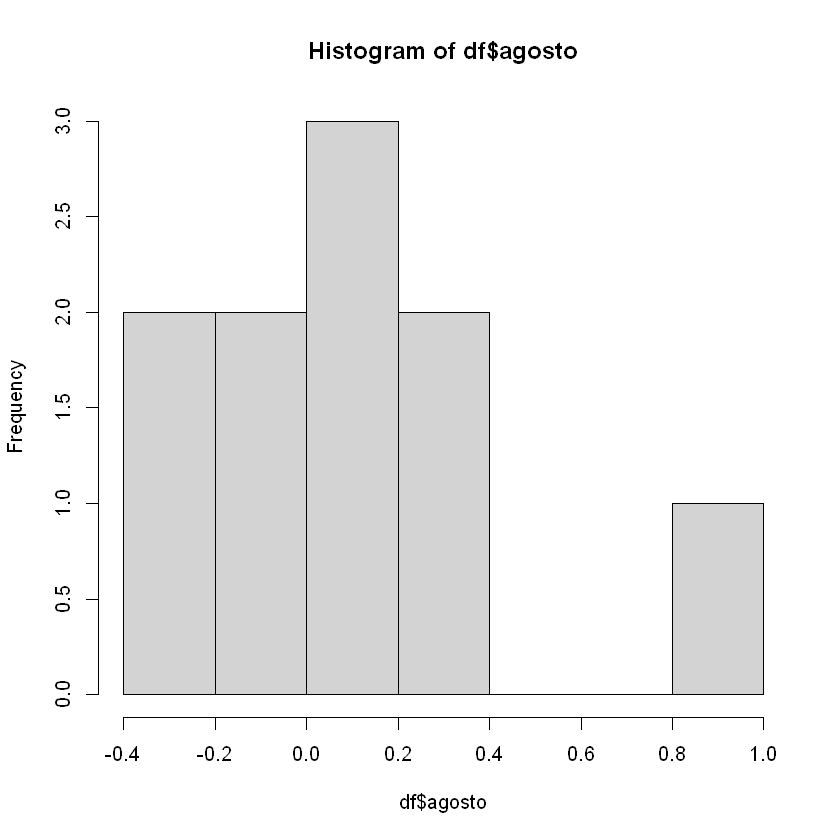

In [74]:
hist(df$agosto)

In [75]:
df_mean <- unlist(lapply(df[, c(4, 5, 6, 7, 8)], mean))
df_mean

agosto setembro  outubro novembro dezembro 
   0.150    0.174    1.668    0.281    0.315

In [76]:
dbDisconnect(con)

# Capítulo 4.11: Analisando dados do MySQL

In [ ]:
install.packages('RMySQL')

In [79]:
library(RMySQL)
library(ggplot2)
library(dplyr)

In [ ]:
# Conexão com o banco de dados
con = dbConnect(MySQL(), user = "daniel", password = "1234", dbname = "titanicDB", host = "localhost")

In [ ]:
# Query
qry <- "select pclass, survived, avg(age) as media_idade from titanic where survived = 1 group by pclass, survived;"

In [ ]:
dbGetQuery(con, qry)

In [ ]:
# Plotar
dados <- dbGetQuery(con, qry)

In [ ]:
head(dados)

In [ ]:
class(dados)

In [ ]:
ggplot(dados, aes(pclass, media_idade)) + geom_bar(stat = "identity")

In [ ]:
# Conectando no MySQL com dplyr
con2 <- src_mysql(dbname = "titanicDB", user = "daniel", password = "dsa1234", host = "localhost")

In [ ]:
dados2 <- con2 %>%
  tbl("titanic") %>%
  select(pclass, sex, age, survived, fare) %>%
  filter(survived == 0) %>%
  collect()

In [ ]:
head(dados2)

In [ ]:
# Manipulando dados
dados2 <- con2 %>%
  tbl("titanic") %>%
  select(pclass, sex, survived) %>%
  group_by(pclass, sex) %>%
  summarise(survival_ratio = mean(survived)) %>%
  collect() 

# %>% Operador de concatenação

In [ ]:
ggplot(dados2, aes(pclass,survival_ratio, color=sex, group=sex)) +
  geom_point(size=3) + geom_line()

In [ ]:
# Sumarizando os dados
dados2 <- con2 %>%
  tbl("titanic") %>% 
  filter(fare > 150) %>%
  select(pclass,sex,age,fare) %>%
  group_by(pclass,sex) %>% 
  summarise(avg_age = mean(age),
            avg_fare = mean(fare))

In [ ]:
head(dados2)

In [ ]:
# --> Para outros bancos de dados, use RODBC

# Capítulo 4.14: Trabalhando com R e MongoDB

Criando uma coleção no MongoDB (abrir o prompt e navegar até o diretório bin dentro do diretório de instalação do mongoDB e executar na linha de comando)

**Etapa 1:** Abra um prompt de comando e forneça o comando mongod para se conectar ao servidor MongoDB e não feche este cmd

**Etapa 2:** Abra outro prompt de comando e execute o shell mongo. Usando o comando mongo.

**Etapa 3:** Abra mais uma janela de prompt de comando e direcione-a para a pasta bin [C:\Program Files\MongoDB\Server\5.0\bin] e agora você está pronto para importar arquivos no banco de dados mongoDB.

mongoimport --db users --collection contatos --file C:\data\db\zips.json

In [ ]:
# O pacote rmongodb foi descontinuado e não receberá mais atualização. Quando isso acontece, o pacote fica disponível no 
# Archive do CRAN. O pacote ainda pode ser utilizado normalmente, mas precisa fazer o download do arquivo e instalar em sua máquina. 

# O link para o download está aqui: https://cran.r-project.org/src/contrib/Archive/rmongodb/. 

# O comando para instalar o pacote é install.packages("nome_completo_do_pacote", repos = NULL, type = "source"). 

# Coloque o pacote no mesmo diretório de trabalho da sua sessão no RStudio. 
# O pacote pode ser usado normalmente, embora não seja mais atualizado pelo criador do pacote.


In [82]:
# Instalação do Pacote
# install.packages("rmongodb")
install.packages("rmongodb_1.8.0.tar.gz", repos = NULL, type = "source")

In [91]:
library(rmongodb)

In [92]:
# Criando a conexão
help("mongo.create")

In [93]:
mongo <- mongo.create()

In [94]:
mongo

[1] 0
attr(,"mongo")
<pointer: 0x000000000f98a668>
attr(,"class")
[1] "mongo"
attr(,"host")
[1] "127.0.0.1"
attr(,"name")
[1] ""
attr(,"username")
[1] ""
attr(,"password")
[1] ""
attr(,"db")
[1] "admin"
attr(,"timeout")
[1] 0

In [95]:
# Checando a conexão
mongo.is.connected(mongo)

[1] TRUE

In [96]:
if(mongo.is.connected(mongo) == TRUE) {
  mongo.get.databases(mongo)
}

[1] "cadastrodb" "config"     "users"

In [97]:
# Armazenando o nome de uma das coleções
coll <- "users.contatos"

In [ ]:
# Contando os registros em uma coleção
help("mongo.count")

In [98]:
mongo.count(mongo, coll)

[1] 29353

In [99]:
# Buscando um registro em uma coleção
mongo.find.one(mongo, coll)

[1] 0
attr(,"mongo.bson")
<pointer: 0x0000000004cd5b28>
attr(,"class")
[1] "mongo.bson"

In [100]:
# Obtendo um vetor de valores distintos das chaves de uma coleção
res <- mongo.distinct(mongo, coll, "city")

In [101]:
head(res)

[1] "AARON"         "AARONSBURG"    "ABAC"          "ABBEVILLE"    
[5] "ABBOT VILLAGE" "ABBOTSFORD"

In [102]:
# Obtendo um vetor de valores distintos das chaves de uma coleção
# E gerando um histograma
pop <- mongo.distinct(mongo, coll, "pop")

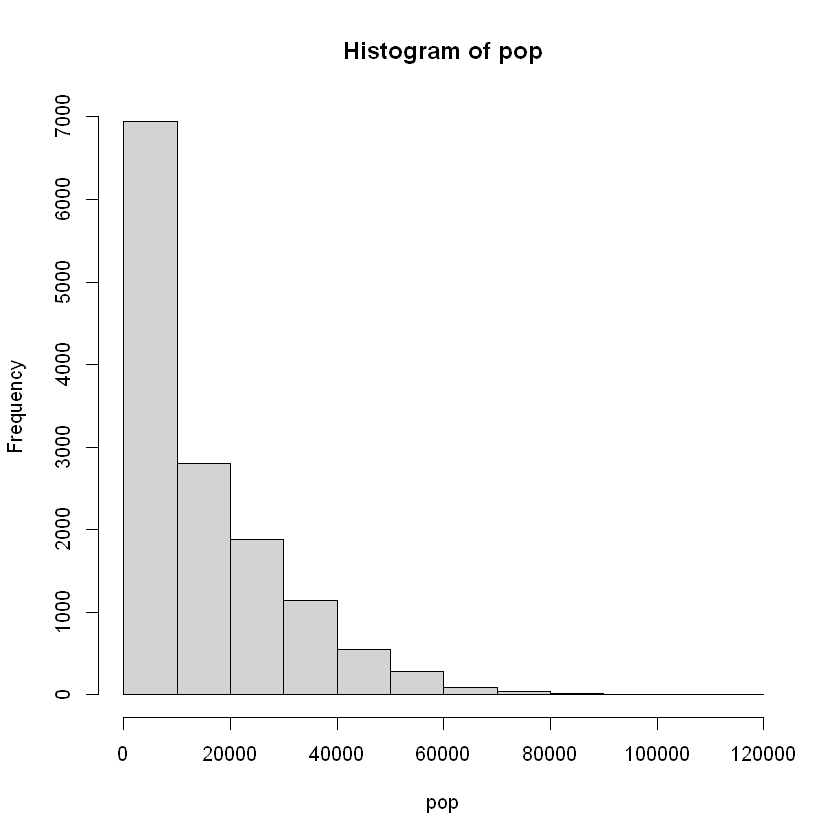

In [103]:
hist(pop)

In [104]:
# Contando os elementos
nr <- mongo.count(mongo, coll, list('pop' = list('$lte' = 2)))

In [105]:
print( nr )

[1] 85


In [106]:
# Buscando todos os elementos
pops <- mongo.find.all(mongo, coll, list('pop' = list('$lte' = 2)))

In [107]:
head(pops, 2)

[[1]]
[[1]]$`_id`
[1] "02163"

[[1]]$city
[1] "CAMBRIDGE"

[[1]]$loc
[1] -71.14188  42.36400

[[1]]$pop
[1] 0

[[1]]$state
[1] "MA"


[[2]]
[[2]]$`_id`
[1] "04013"

[[2]]$city
[1] "BUSTINS ISLAND"

[[2]]$loc
[1] -70.04225  43.79602

[[2]]$pop
[1] 0

[[2]]$state
[1] "ME"

In [108]:
# Encerrando a conexão
mongo.destroy(mongo)

NULL

In [109]:
# Criando e validando um arquivo json
library(jsonlite)

In [110]:
json_arquivo <- '{"pop":{"$lte":2}, "pop":{"$gte":1}}'

In [111]:
cat(prettify(json_arquivo))

{
    "pop": {
        "$lte": 2
    },
    "pop": {
        "$gte": 1
    }
}


In [112]:
validate(json_arquivo)

[1] TRUE

# Capítulo 4.16: Formatando e Limpando Dados com Deplyr e Tidyr

### Transformação de Dados

In [ ]:
install.packages("readr")
install.packages("dplyr")

In [113]:
library(readr)
library(dplyr)

In [116]:
# Suprimindo mensagens de warning
searchpaths()

[1] ".GlobalEnv"                                  
 [2] "C:/Program Files/R/R-4.1.2/library/readr"    
 [3] "C:/Program Files/R/R-4.1.2/library/jsonlite" 
 [4] "C:/Program Files/R/R-4.1.2/library/rmongodb" 
 [5] "C:/Program Files/R/R-4.1.2/library/dplyr"    
 [6] "C:/Program Files/R/R-4.1.2/library/ggplot2"  
 [7] "C:/Program Files/R/R-4.1.2/library/RMySQL"   
 [8] "C:/Program Files/R/R-4.1.2/library/DBI"      
 [9] "C:/Program Files/R/R-4.1.2/library/RSQLite"  
[10] "C:/Program Files/R/R-4.1.2/library/gdata"    
[11] "C:/Program Files/R/R-4.1.2/library/XLConnect"
[12] "C:/Program Files/R/R-4.1.2/library/xlsx"     
[13] "C:/Program Files/R/R-4.1.2/library/rJava"    
[14] "C:/Program Files/R/R-4.1.2/library/readxl"   
[15] "jupyter:irkernel"                            
[16] "C:/Program Files/R/R-4.1.2/library/stats"    
[17] "C:/Program Files/R/R-4.1.2/library/graphics" 
[18] "C:/Program Files/R/R-4.1.2/library/grDevices"
[19] "C:/Program Files/R/R-4.1.2/library/utils"    
[20] "C:/Program Files/R/R-4.1.2/library/datasets" 
[21] "C:/Program Files/R/R-4.1.2/library/methods"  
[22] "Autoloads"                                   
[23] "C:/PROGRA~1/R/R-41~1.2/library/base"

In [117]:
suppressMessages(library(dplyr))

In [118]:
# Carregando o dataset
df_sono <- read_csv("C:\\Users\\Daniel\\Documents\\Arquivos Técnicos\\Arquivos\\Programação\\_Cursos\\DSA - Cientista de Dados\\01. Big Data Analytics com R e Microsoft Azure Machine Learning\\Datasets\\Parte 3\\sono.csv")

Rows: 30 Columns: 7
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (3): nome, cidade, pais
dbl (4): sono_total, sono_ciclo, sono_indice, peso

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [119]:
head(df_sono)

nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Breno,Recife,Brasil,12.1,NA,11.9,50
Monica,Fortaleza,Brasil,17.0,NA,7.0,72
Tiago,Goiania,Brasil,14.4,NA,9.6,63
Fernando,Curitiba,Brasil,14.9,0.1333333,9.1,67
Matias,Recife,Brasil,4.0,0.6666667,20.0,49
Carlos,Recife,Brasil,14.4,0.7666667,9.6,56


In [120]:
class(df_sono)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [121]:
str(df_sono)

spec_tbl_df [30 x 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ nome       : chr [1:30] "Breno" "Monica" "Tiago" "Fernando" ...
 $ cidade     : chr [1:30] "Recife" "Fortaleza" "Goiania" "Curitiba" ...
 $ pais       : chr [1:30] "Brasil" "Brasil" "Brasil" "Brasil" ...
 $ sono_total : num [1:30] 12.1 17 14.4 14.9 4 14.4 8.7 7 10.1 3 ...
 $ sono_ciclo : num [1:30] NA NA NA 0.133 0.667 ...
 $ sono_indice: num [1:30] 11.9 7 9.6 9.1 20 9.6 15.3 17 13.9 21 ...
 $ peso       : num [1:30] 50 72 63 67 49 56 58 90 101 95 ...
 - attr(*, "spec")=
  .. cols(
  ..   nome = col_character(),
  ..   cidade = col_character(),
  ..   pais = col_character(),
  ..   sono_total = col_double(),
  ..   sono_ciclo = col_double(),
  ..   sono_indice = col_double(),
  ..   peso = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [122]:
# glimpse é uma função parecida com a função str (glimpse significa dar uma olhada)
glimpse(df_sono)

Rows: 30
Columns: 7
$ nome        <chr> "Breno", "Monica", "Tiago", "Fernando", "Matias", "Carlos"~
$ cidade      <chr> "Recife", "Fortaleza", "Goiania", "Curitiba", "Recife", "R~
$ pais        <chr> "Brasil", "Brasil", "Brasil", "Brasil", "Brasil", "Brasil"~
$ sono_total  <dbl> 12.1, 17.0, 14.4, 14.9, 4.0, 14.4, 8.7, 7.0, 10.1, 3.0, 5.~
$ sono_ciclo  <dbl> NA, NA, NA, 0.1333333, 0.6666667, 0.7666667, 0.3833333, NA~
$ sono_indice <dbl> 11.9, 7.0, 9.6, 9.1, 20.0, 9.6, 15.3, 17.0, 13.9, 21.0, 18~
$ peso        <dbl> 50, 72, 63, 67, 49, 56, 58, 90, 101, 95, 56, 62, 69, 67, 6~


In [123]:
# Simulando uma nova coluna com as especificações abaixo
# Com a função glipse você não está criando uma nova coluna no seu df
glimpse(mutate(df_sono, peso_libras = sono_total / 0.45359237))

Rows: 30
Columns: 8
$ nome        <chr> "Breno", "Monica", "Tiago", "Fernando", "Matias", "Carlos"~
$ cidade      <chr> "Recife", "Fortaleza", "Goiania", "Curitiba", "Recife", "R~
$ pais        <chr> "Brasil", "Brasil", "Brasil", "Brasil", "Brasil", "Brasil"~
$ sono_total  <dbl> 12.1, 17.0, 14.4, 14.9, 4.0, 14.4, 8.7, 7.0, 10.1, 3.0, 5.~
$ sono_ciclo  <dbl> NA, NA, NA, 0.1333333, 0.6666667, 0.7666667, 0.3833333, NA~
$ sono_indice <dbl> 11.9, 7.0, 9.6, 9.1, 20.0, 9.6, 15.3, 17.0, 13.9, 21.0, 18~
$ peso        <dbl> 50, 72, 63, 67, 49, 56, 58, 90, 101, 95, 56, 62, 69, 67, 6~
$ peso_libras <dbl> 26.675934, 37.478585, 31.746566, 32.848877, 8.818490, 31.7~


In [124]:
count(df_sono, cidade)

cidade,n
<chr>,<int>
Belo Horizonte,2
Blumenau,3
Buenos Aires,6
Capri,1
Curitiba,2
Fortaleza,1
Goiania,2
Maceio,5
Porto Alegre,3


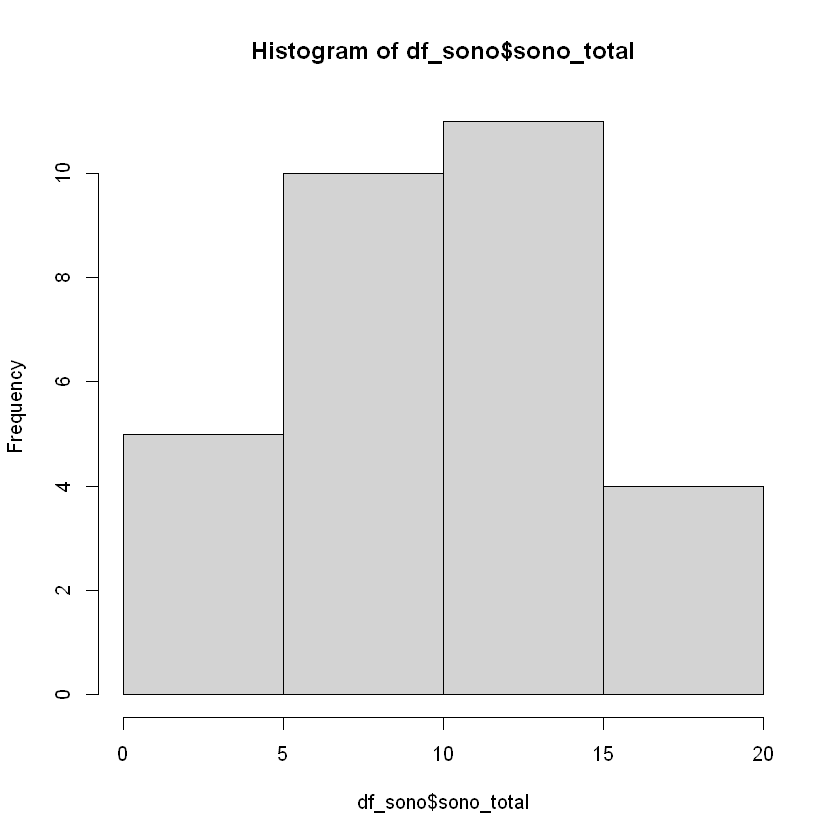

In [125]:
hist(df_sono$sono_total)

In [126]:
# Amostra
sample_n(df_sono, size = 10)

nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Nadia,Recife,Brasil,10.1,0.2833333,13.9,120
Tamires,Capri,Brasil,5.3,NA,18.7,56
Norma,Goiania,Brasil,10.9,NA,13.1,90
Flavio,Blumenau,Brasil,10.0,NA,14.0,69
Carlos,Recife,Brasil,14.4,0.7666667,9.6,56
Breno,Recife,Brasil,12.1,NA,11.9,50
Monica,Fortaleza,Brasil,17.0,NA,7.0,72
Galago,Buenos Aires,Argentina,9.8,0.5500000,14.2,71
Fernando,Curitiba,Brasil,14.9,0.1333333,9.1,67


In [ ]:
?sample_n

In [127]:
# select()
sleepData <- select(df_sono, nome, sono_total)

In [128]:
head(sleepData)

nome,sono_total
<chr>,<dbl>
Breno,12.1
Monica,17.0
Tiago,14.4
Fernando,14.9
Matias,4.0
Carlos,14.4


In [129]:
class(sleepData)

[1] "tbl_df"     "tbl"        "data.frame"

In [130]:
select(df_sono, nome)

nome
<chr>
Breno
Monica
Tiago
Fernando
Matias
Carlos
Josias
Marta
Carolina


In [131]:
select(df_sono, nome:cidade)

nome,cidade
<chr>,<chr>
Breno,Recife
Monica,Fortaleza
Tiago,Goiania
Fernando,Curitiba
Matias,Recife
Carlos,Recife
Josias,Rio de Janeiro
Marta,Porto Alegre
Carolina,Porto Alegre


In [132]:
# filter()
filter(df_sono, sono_total >= 16)

nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Monica,Fortaleza,Brasil,17.0,NA,7.0,72
Leonardo,Maceio,Brasil,17.4,0.3833333,6.6,70
Sandro,Maceio,Brasil,18.0,0.3333333,6.0,78
Raisa,Maceio,Brasil,19.7,0.1166667,4.3,88


In [133]:
filter(df_sono, sono_total >= 16, peso >= 80)

nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Raisa,Maceio,Brasil,19.7,0.1166667,4.3,88


In [134]:
filter(df_sono, cidade %in% c("Recife", "Curitiba"))

nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Breno,Recife,Brasil,12.1,NA,11.9,50
Fernando,Curitiba,Brasil,14.9,0.1333333,9.1,67
Matias,Recife,Brasil,4.0,0.6666667,20.0,49
Carlos,Recife,Brasil,14.4,0.7666667,9.6,56
Leslie,Curitiba,Brasil,2.9,1.0000000,21.1,88
Nadia,Recife,Brasil,10.1,0.2833333,13.9,120


In [135]:
# arrange()
df_sono %>% arrange(cidade) %>% head

# arrange organiza o df por valores

nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Lais,Belo Horizonte,Brasil,14.9,NA,9.1,96
Larissa,Belo Horizonte,Brasil,12.5,0.4166667,11.5,58
Natacha,Blumenau,Brasil,9.4,0.2166667,14.6,62
Flavio,Blumenau,Brasil,10.0,NA,14.0,69
Natalia,Blumenau,Brasil,12.5,0.1166667,11.5,67
Abel,Buenos Aires,Argentina,10.3,NA,13.7,66


In [136]:
df_sono %>% 
  select(nome, cidade, sono_total) %>%
  arrange(cidade, sono_total) %>% 
  head

nome,cidade,sono_total
<chr>,<chr>,<dbl>
Larissa,Belo Horizonte,12.5
Lais,Belo Horizonte,14.9
Natacha,Blumenau,9.4
Flavio,Blumenau,10.0
Natalia,Blumenau,12.5
Abelardo,Buenos Aires,3.1


In [137]:
df_sono %>% 
  select(nome, cidade, sono_total) %>%
  arrange(cidade, sono_total) %>% 
  filter(sono_total >= 16)

nome,cidade,sono_total
<chr>,<chr>,<dbl>
Monica,Fortaleza,17.0
Leonardo,Maceio,17.4
Sandro,Maceio,18.0
Raisa,Maceio,19.7


In [138]:
df_sono %>% 
  select(nome, cidade, sono_total) %>%
  arrange(cidade, desc(sono_total)) %>%   # desc(sono_total): Do maior para o menor
  filter(sono_total >= 16)

nome,cidade,sono_total
<chr>,<chr>,<dbl>
Monica,Fortaleza,17.0
Raisa,Maceio,19.7
Sandro,Maceio,18.0
Leonardo,Maceio,17.4


In [139]:
head(df_sono)

nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Breno,Recife,Brasil,12.1,NA,11.9,50
Monica,Fortaleza,Brasil,17.0,NA,7.0,72
Tiago,Goiania,Brasil,14.4,NA,9.6,63
Fernando,Curitiba,Brasil,14.9,0.1333333,9.1,67
Matias,Recife,Brasil,4.0,0.6666667,20.0,49
Carlos,Recife,Brasil,14.4,0.7666667,9.6,56


In [140]:
# mutate() - Incluindo nova coluna do df
df_sono %>% 
  mutate(novo_indice = sono_total / peso) %>%
  head

nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso,novo_indice
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Breno,Recife,Brasil,12.1,NA,11.9,50,0.24200000
Monica,Fortaleza,Brasil,17.0,NA,7.0,72,0.23611111
Tiago,Goiania,Brasil,14.4,NA,9.6,63,0.22857143
Fernando,Curitiba,Brasil,14.9,0.1333333,9.1,67,0.22238806
Matias,Recife,Brasil,4.0,0.6666667,20.0,49,0.08163265
Carlos,Recife,Brasil,14.4,0.7666667,9.6,56,0.25714286


In [141]:
head(df_sono)

nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Breno,Recife,Brasil,12.1,NA,11.9,50
Monica,Fortaleza,Brasil,17.0,NA,7.0,72
Tiago,Goiania,Brasil,14.4,NA,9.6,63
Fernando,Curitiba,Brasil,14.9,0.1333333,9.1,67
Matias,Recife,Brasil,4.0,0.6666667,20.0,49
Carlos,Recife,Brasil,14.4,0.7666667,9.6,56


In [142]:
df_sono %>% 
  mutate(novo_indice = sono_total / peso, 
         peso_libras = peso / 0.45359237) %>%
  head

nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso,novo_indice,peso_libras
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Breno,Recife,Brasil,12.1,NA,11.9,50,0.24200000,110.2311
Monica,Fortaleza,Brasil,17.0,NA,7.0,72,0.23611111,158.7328
Tiago,Goiania,Brasil,14.4,NA,9.6,63,0.22857143,138.8912
Fernando,Curitiba,Brasil,14.9,0.1333333,9.1,67,0.22238806,147.7097
Matias,Recife,Brasil,4.0,0.6666667,20.0,49,0.08163265,108.0265
Carlos,Recife,Brasil,14.4,0.7666667,9.6,56,0.25714286,123.4589


In [143]:
# summarize() - Resumo do df
df_sono %>% 
  summarise(media_sono = mean(sono_total))

media_sono
<dbl>
10.29333


In [144]:
df_sono %>% 
  summarise(media_sono = mean(sono_total), 
            min_sono = min(sono_total),
            max_ssono = max(sono_total),
            total = n())

media_sono,min_sono,max_ssono,total
<dbl>,<dbl>,<dbl>,<int>
10.29333,2.9,19.7,30


In [145]:
# group_by()
df_sono %>% 
  group_by(cidade) %>%
  summarise(avg_sono = mean(sono_total), 
            min_sono = min(sono_total), 
            max_sono = max(sono_total),
            total = n())

cidade,avg_sono,min_sono,max_sono,total
<chr>,<dbl>,<dbl>,<dbl>,<int>
Belo Horizonte,13.700000,12.5,14.9,2
Blumenau,10.633333,9.4,12.5,3
Buenos Aires,7.766667,3.1,10.3,6
Capri,5.300000,5.3,5.3,1
Curitiba,8.900000,2.9,14.9,2
Fortaleza,17.000000,17.0,17.0,1
Goiania,12.650000,10.9,14.4,2
Maceio,13.620000,3.9,19.7,5
Porto Alegre,6.700000,3.0,10.1,3


In [146]:
# Função Select()
head(select(df_sono, nome, sono_total))

nome,sono_total
<chr>,<dbl>
Breno,12.1
Monica,17.0
Tiago,14.4
Fernando,14.9
Matias,4.0
Carlos,14.4


In [147]:
# Pipe operator: %>%
df_sono %>% 
  select(nome, sono_total) %>% 
  head

nome,sono_total
<chr>,<dbl>
Breno,12.1
Monica,17.0
Tiago,14.4
Fernando,14.9
Matias,4.0
Carlos,14.4


In [148]:
df_sono %>%
  mutate(novo_indice = round(sono_total * peso)) %>%
  arrange(desc(novo_indice)) %>%
  select(cidade, novo_indice)

cidade,novo_indice
<chr>,<dbl>
Maceio,1734
Belo Horizonte,1430
Maceio,1404
Fortaleza,1224
Maceio,1218
Recife,1212
Porto Alegre,1020
Curitiba,998
Goiania,981


In [149]:
df_sono

nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Breno,Recife,Brasil,12.1,NA,11.9,50
Monica,Fortaleza,Brasil,17.0,NA,7.0,72
Tiago,Goiania,Brasil,14.4,NA,9.6,63
Fernando,Curitiba,Brasil,14.9,0.1333333,9.1,67
Matias,Recife,Brasil,4.0,0.6666667,20.0,49
Carlos,Recife,Brasil,14.4,0.7666667,9.6,56
Josias,Rio de Janeiro,Brasil,8.7,0.3833333,15.3,58
Marta,Porto Alegre,Brasil,7.0,NA,17.0,90
Carolina,Porto Alegre,Brasil,10.1,0.3333333,13.9,101


In [ ]:
# Instalando pacote hflights (Dados de voos de Houston)
install.packages("hflights")

In [150]:
library(hflights)

In [ ]:
?hflights

In [151]:
# Criando um objeto tbl
flights <- tbl_df(hflights)
flights

Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,...,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
2011,1,1,6,1400,1500,AA,428,N576AA,60,...,-10,0,IAH,DFW,224,7,13,0,,0
2011,1,2,7,1401,1501,AA,428,N557AA,60,...,-9,1,IAH,DFW,224,6,9,0,,0
2011,1,3,1,1352,1502,AA,428,N541AA,70,...,-8,-8,IAH,DFW,224,5,17,0,,0
2011,1,4,2,1403,1513,AA,428,N403AA,70,...,3,3,IAH,DFW,224,9,22,0,,0
2011,1,5,3,1405,1507,AA,428,N492AA,62,...,-3,5,IAH,DFW,224,9,9,0,,0
2011,1,6,4,1359,1503,AA,428,N262AA,64,...,-7,-1,IAH,DFW,224,6,13,0,,0
2011,1,7,5,1359,1509,AA,428,N493AA,70,...,-1,-1,IAH,DFW,224,12,15,0,,0
2011,1,8,6,1355,1454,AA,428,N477AA,59,...,-16,-5,IAH,DFW,224,7,12,0,,0
2011,1,9,7,1443,1554,AA,428,N476AA,71,...,44,43,IAH,DFW,224,8,22,0,,0


In [ ]:
?tbl_df

# Cria um df do tipo tbl_df.
# Objetos tbl_df oferecem capacidade de checagem e impressão melhores que os dataframes.

In [152]:
# Resumindo os dados
str(hflights)

'data.frame':	227496 obs. of  21 variables:
 $ Year             : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ Month            : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DayofMonth       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DayOfWeek        : int  6 7 1 2 3 4 5 6 7 1 ...
 $ DepTime          : int  1400 1401 1352 1403 1405 1359 1359 1355 1443 1443 ...
 $ ArrTime          : int  1500 1501 1502 1513 1507 1503 1509 1454 1554 1553 ...
 $ UniqueCarrier    : chr  "AA" "AA" "AA" "AA" ...
 $ FlightNum        : int  428 428 428 428 428 428 428 428 428 428 ...
 $ TailNum          : chr  "N576AA" "N557AA" "N541AA" "N403AA" ...
 $ ActualElapsedTime: int  60 60 70 70 62 64 70 59 71 70 ...
 $ AirTime          : int  40 45 48 39 44 45 43 40 41 45 ...
 $ ArrDelay         : int  -10 -9 -8 3 -3 -7 -1 -16 44 43 ...
 $ DepDelay         : int  0 1 -8 3 5 -1 -1 -5 43 43 ...
 $ Origin           : chr  "IAH" "IAH" "IAH" "IAH" ...
 $ Dest             : chr  "DFW" "DFW" "DFW" "DFW" ...
 $ Distance        

In [153]:
glimpse(hflights)

Rows: 227,496
Columns: 21
$ Year              <int> 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011~
$ Month             <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1~
$ DayofMonth        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 1~
$ DayOfWeek         <int> 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2~
$ DepTime           <int> 1400, 1401, 1352, 1403, 1405, 1359, 1359, 1355, 1443~
$ ArrTime           <int> 1500, 1501, 1502, 1513, 1507, 1503, 1509, 1454, 1554~
$ UniqueCarrier     <chr> "AA", "AA", "AA", "AA", "AA", "AA", "AA", "AA", "AA"~
$ FlightNum         <int> 428, 428, 428, 428, 428, 428, 428, 428, 428, 428, 42~
$ TailNum           <chr> "N576AA", "N557AA", "N541AA", "N403AA", "N492AA", "N~
$ ActualElapsedTime <int> 60, 60, 70, 70, 62, 64, 70, 59, 71, 70, 70, 56, 63, ~
$ AirTime           <int> 40, 45, 48, 39, 44, 45, 43, 40, 41, 45, 42, 41, 44, ~
$ ArrDelay          <int> -10, -9, -8, 3, -3, -7, -1, -16, 44, 43, 29, 5, -9, ~
$ DepDelay    

In [154]:
data.frame(head(flights))

Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,...,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
2011,1,1,6,1400,1500,AA,428,N576AA,60,...,-10,0,IAH,DFW,224,7,13,0,,0
2011,1,2,7,1401,1501,AA,428,N557AA,60,...,-9,1,IAH,DFW,224,6,9,0,,0
2011,1,3,1,1352,1502,AA,428,N541AA,70,...,-8,-8,IAH,DFW,224,5,17,0,,0
2011,1,4,2,1403,1513,AA,428,N403AA,70,...,3,3,IAH,DFW,224,9,22,0,,0
2011,1,5,3,1405,1507,AA,428,N492AA,62,...,-3,5,IAH,DFW,224,9,9,0,,0
2011,1,6,4,1359,1503,AA,428,N262AA,64,...,-7,-1,IAH,DFW,224,6,13,0,,0


In [156]:
# flights[LINHA, COLUNA ] 
# Vazio: Todas as colunas
flights[flights$Month == 1 & flights$DayofMonth == 1, ] %>% head

Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,...,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
2011,1,1,6,1400,1500,AA,428,N576AA,60,...,-10,0,IAH,DFW,224,7,13,0,,0
2011,1,1,6,728,840,AA,460,N520AA,72,...,5,8,IAH,DFW,224,6,25,0,,0
2011,1,1,6,1631,1736,AA,1121,N4WVAA,65,...,-9,1,IAH,DFW,224,16,12,0,,0
2011,1,1,6,1756,2112,AA,1294,N3DGAA,136,...,-3,1,IAH,MIA,964,9,14,0,,0
2011,1,1,6,1012,1347,AA,1700,N3DAAA,155,...,7,-8,IAH,MIA,964,12,26,0,,0
2011,1,1,6,1211,1325,AA,1820,N593AA,74,...,15,6,IAH,DFW,224,6,29,0,,0


In [157]:
filter(flights, Month == 1, DayofMonth == 1) %>% head

Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,...,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
2011,1,1,6,1400,1500,AA,428,N576AA,60,...,-10,0,IAH,DFW,224,7,13,0,,0
2011,1,1,6,728,840,AA,460,N520AA,72,...,5,8,IAH,DFW,224,6,25,0,,0
2011,1,1,6,1631,1736,AA,1121,N4WVAA,65,...,-9,1,IAH,DFW,224,16,12,0,,0
2011,1,1,6,1756,2112,AA,1294,N3DGAA,136,...,-3,1,IAH,MIA,964,9,14,0,,0
2011,1,1,6,1012,1347,AA,1700,N3DAAA,155,...,7,-8,IAH,MIA,964,12,26,0,,0
2011,1,1,6,1211,1325,AA,1820,N593AA,74,...,15,6,IAH,DFW,224,6,29,0,,0


In [158]:
filter(flights, UniqueCarrier == "AA" | UniqueCarrier == "UA") %>% head

Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,...,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
2011,1,1,6,1400,1500,AA,428,N576AA,60,...,-10,0,IAH,DFW,224,7,13,0,,0
2011,1,2,7,1401,1501,AA,428,N557AA,60,...,-9,1,IAH,DFW,224,6,9,0,,0
2011,1,3,1,1352,1502,AA,428,N541AA,70,...,-8,-8,IAH,DFW,224,5,17,0,,0
2011,1,4,2,1403,1513,AA,428,N403AA,70,...,3,3,IAH,DFW,224,9,22,0,,0
2011,1,5,3,1405,1507,AA,428,N492AA,62,...,-3,5,IAH,DFW,224,9,9,0,,0
2011,1,6,4,1359,1503,AA,428,N262AA,64,...,-7,-1,IAH,DFW,224,6,13,0,,0


In [159]:
filter(flights, UniqueCarrier %in% c("AA", "UA")) %>% head

Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<int>,...,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
2011,1,1,6,1400,1500,AA,428,N576AA,60,...,-10,0,IAH,DFW,224,7,13,0,,0
2011,1,2,7,1401,1501,AA,428,N557AA,60,...,-9,1,IAH,DFW,224,6,9,0,,0
2011,1,3,1,1352,1502,AA,428,N541AA,70,...,-8,-8,IAH,DFW,224,5,17,0,,0
2011,1,4,2,1403,1513,AA,428,N403AA,70,...,3,3,IAH,DFW,224,9,22,0,,0
2011,1,5,3,1405,1507,AA,428,N492AA,62,...,-3,5,IAH,DFW,224,9,9,0,,0
2011,1,6,4,1359,1503,AA,428,N262AA,64,...,-7,-1,IAH,DFW,224,6,13,0,,0


In [160]:
select(flights, Year:DayofMonth, contains("Taxi"), contains("Delay")) %>% head

Year,Month,DayofMonth,TaxiIn,TaxiOut,ArrDelay,DepDelay
<int>,<int>,<int>,<int>,<int>,<int>,<int>
2011,1,1,7,13,-10,0
2011,1,2,6,9,-9,1
2011,1,3,5,17,-8,-8
2011,1,4,9,22,3,3
2011,1,5,9,9,-3,5
2011,1,6,6,13,-7,-1


In [162]:
flights %>%
  select(UniqueCarrier, DepDelay) %>%
  arrange(DepDelay) %>% 
  head

UniqueCarrier,DepDelay
<chr>,<int>
OO,-33
MQ,-23
XE,-19
XE,-19
CO,-18
EV,-18


In [163]:
flights %>%
  select(Distance, AirTime) %>%
  mutate(Speed = Distance/AirTime*60) %>% 
  head

Distance,AirTime,Speed
<int>,<int>,<dbl>
224,40,336.0000
224,45,298.6667
224,48,280.0000
224,39,344.6154
224,44,305.4545
224,45,298.6667


In [165]:
head(with(flights, tapply(ArrDelay, Dest, mean, na.rm = TRUE)))

ABQ       AEX       AGS       AMA       ANC       ASE 
 7.226259  5.839437  4.000000  6.840095 26.080645  6.794643

In [169]:
head(aggregate(ArrDelay ~ Dest, flights, mean)) 

,Dest,ArrDelay
,<chr>,<dbl>
1,ABQ,7.226259
2,AEX,5.839437
3,AGS,4.000000
4,AMA,6.840095
5,ANC,26.080645
6,ASE,6.794643


In [170]:
flights %>%
  group_by(Month, DayofMonth) %>%
  tally(sort = TRUE) %>%
  head

Month,DayofMonth,n
<int>,<int>,<int>
8,4,706
8,11,706
8,12,706
8,5,705
8,3,704
8,10,704


### TIDYR: Remodelagem de Dados

In [ ]:
install.packages("tidyr")

In [171]:
library(tidyr)
library(ggplot2)

In [172]:
# Criando Dados
df <- data.frame(
  nome = c("Game Of Thrones", "Mr. Robot", "Silicon Valley"),
  regiaoA = c(97, 80, 84),
  regiaoB= c(86, 90, 91)
)

In [173]:
df

nome,regiaoA,regiaoB
<chr>,<dbl>,<dbl>
Game Of Thrones,97,86
Mr. Robot,80,90
Silicon Valley,84,91


In [174]:
# gather: Remodelagem dos dados com apenas uma coluna numérica
df %>%
  gather(Regiao, NotaFinal, regiaoA:regiaoB)

nome,Regiao,NotaFinal
<chr>,<chr>,<dbl>
Game Of Thrones,regiaoA,97
Mr. Robot,regiaoA,80
Silicon Valley,regiaoA,84
Game Of Thrones,regiaoB,86
Mr. Robot,regiaoB,90
Silicon Valley,regiaoB,91


In [175]:
# Criando dados
set.seed(10)
df2 <- data.frame(
  id = 1:4,
  acao = sample(rep(c('controle', 'tratamento'), each = 2)),
  work.T1 = runif(4),
  home.T1 = runif(4),
  work.T2 = runif(4),
  home.T2 = runif(4)
)

In [176]:
df2

id,acao,work.T1,home.T1,work.T2,home.T2
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,tratamento,0.08513597,0.6158293,0.1135090,0.05190332
2,controle,0.22543662,0.4296715,0.5959253,0.26417767
3,controle,0.27453052,0.6516557,0.3580500,0.39879073
4,tratamento,0.27230507,0.5677378,0.4288094,0.83613414


In [177]:
# Reshape 1
df2_organizado1 <- df2 %>%
  gather(key, time, -id, -acao) # usar todas, menos id e menos acao

In [178]:
df2_organizado1 %>% head(8)

,id,acao,key,time
,<int>,<chr>,<chr>,<dbl>
1,1,tratamento,work.T1,0.08513597
2,2,controle,work.T1,0.22543662
3,3,controle,work.T1,0.27453052
4,4,tratamento,work.T1,0.27230507
5,1,tratamento,home.T1,0.61582931
6,2,controle,home.T1,0.42967153
7,3,controle,home.T1,0.65165567
8,4,tratamento,home.T1,0.56773775


In [179]:
# Reshape 2
df2_organizado2 <- df2_organizado1 %>%
  separate(key, into = c("localidade", "tempo"), sep = "\\.") 

In [180]:
df2_organizado2 %>% head(8)

,id,acao,localidade,tempo,time
,<int>,<chr>,<chr>,<chr>,<dbl>
1,1,tratamento,work,T1,0.08513597
2,2,controle,work,T1,0.22543662
3,3,controle,work,T1,0.27453052
4,4,tratamento,work,T1,0.27230507
5,1,tratamento,home,T1,0.61582931
6,2,controle,home,T1,0.42967153
7,3,controle,home,T1,0.65165567
8,4,tratamento,home,T1,0.56773775


In [181]:
# Mais um exemplo
set.seed(1)
df3 <- data.frame(
  participante = c("p1", "p2", "p3", "p4", "p5", "p6"), 
  info = c("g1m", "g1m", "g1f", "g2m", "g2m", "g2m"),
  day1score = rnorm(n = 6, mean = 80, sd = 15), 
  day2score = rnorm(n = 6, mean = 88, sd = 8)
)

In [182]:
print(df3)

  participante info day1score day2score
1           p1  g1m  70.60319  91.89943
2           p2  g1m  82.75465  93.90660
3           p3  g1f  67.46557  92.60625
4           p4  g2m 103.92921  85.55689
5           p5  g2m  84.94262 100.09425
6           p6  g2m  67.69297  91.11875


In [183]:
# Reshape dos dados
df3 %>%
  gather(day, score, c(day1score, day2score))

participante,info,day,score
<chr>,<chr>,<chr>,<dbl>
p1,g1m,day1score,70.60319
p2,g1m,day1score,82.75465
p3,g1f,day1score,67.46557
p4,g2m,day1score,103.92921
p5,g2m,day1score,84.94262
p6,g2m,day1score,67.69297
p1,g1m,day2score,91.89943
p2,g1m,day2score,93.90660
p3,g1f,day2score,92.60625


In [184]:
# spread: Espalha as colunas em outras colunas
df3 %>%
  gather(day, score, c(day1score, day2score)) %>%
  spread(day, score)

participante,info,day1score,day2score
<chr>,<chr>,<dbl>,<dbl>
p1,g1m,70.60319,91.89943
p2,g1m,82.75465,93.90660
p3,g1f,67.46557,92.60625
p4,g2m,103.92921,85.55689
p5,g2m,84.94262,100.09425
p6,g2m,67.69297,91.11875


In [185]:
df3 %>%
  gather(day, score, c(day1score, day2score)) %>%
  separate(col = info, into = c("group", "gender"), sep = 2)

participante,group,gender,day,score
<chr>,<chr>,<chr>,<chr>,<dbl>
p1,g1,m,day1score,70.60319
p2,g1,m,day1score,82.75465
p3,g1,f,day1score,67.46557
p4,g2,m,day1score,103.92921
p5,g2,m,day1score,84.94262
p6,g2,m,day1score,67.69297
p1,g1,m,day2score,91.89943
p2,g1,m,day2score,93.90660
p3,g1,f,day2score,92.60625


In [186]:
# unite: Unindo 2 colunas usando um separador: _
df3 %>%
  gather(day, score, c(day1score, day2score)) %>%
  separate(col = info, into = c("group", "gender"), sep = 2) %>%
  unite(infoAgain, group, gender)

participante,infoAgain,day,score
<chr>,<chr>,<chr>,<dbl>
p1,g1_m,day1score,70.60319
p2,g1_m,day1score,82.75465
p3,g1_f,day1score,67.46557
p4,g2_m,day1score,103.92921
p5,g2_m,day1score,84.94262
p6,g2_m,day1score,67.69297
p1,g1_m,day2score,91.89943
p2,g1_m,day2score,93.90660
p3,g1_f,day2score,92.60625


`geom_smooth()` using formula 'y ~ x'



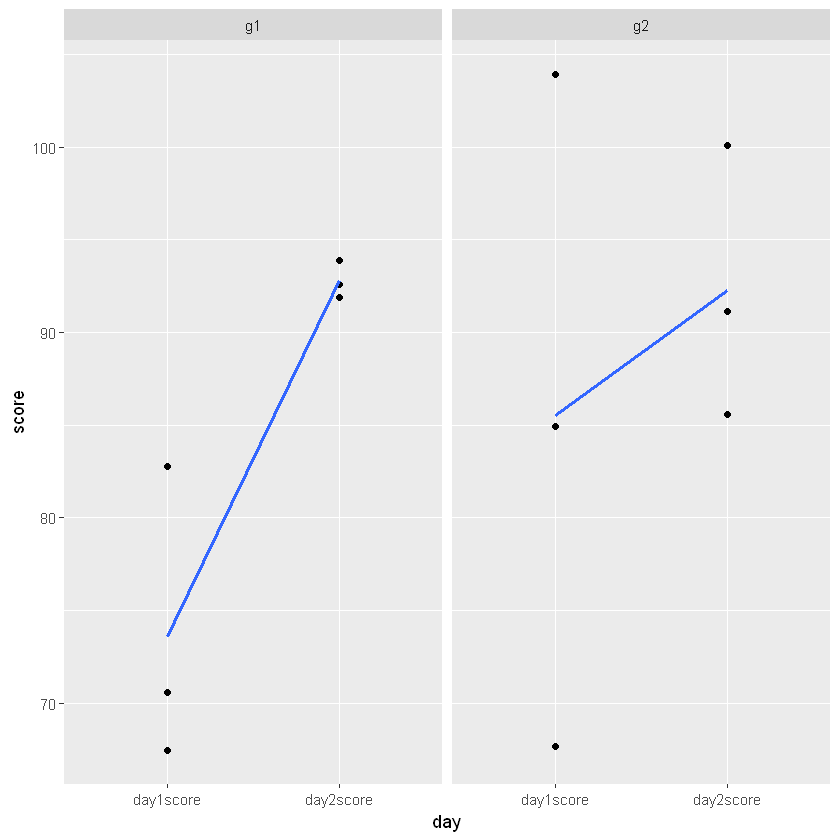

In [187]:
df3 %>%
  gather(day, score, c(day1score, day2score)) %>%
  separate(col = info, into = c("group", "gender"), sep = 2) %>%
  ggplot(aes(x = day, y = score)) + 
  geom_point() + 
  facet_wrap(~ group) +
  geom_smooth(method = "lm", aes(group = 1), se = F)